<a href="https://colab.research.google.com/github/javmencia/COBWEBfiles/blob/main/HIVEpcSurvival2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LSTM

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("Step 0: Setting up environment...")

# Manual 3D array creation function
def create_3d_array(matrix_list):
    if len(matrix_list) == 0:
        raise ValueError("No matrices provided")

    # Get dimensions from first matrix
    n_samples = len(matrix_list)
    n_timesteps = matrix_list[0].shape[0]
    n_features = matrix_list[0].shape[1]

    # Create empty 3D array
    array_3d = np.zeros((n_samples, n_timesteps, n_features))

    # Fill array
    for i in range(n_samples):
        array_3d[i, :, :] = matrix_list[i]

    return array_3d

print("Environment setup complete!")

# Load the data
print("Loading pcdata.csv...")
try:
    sequential_data = pd.read_csv('pcdata.csv')
    print(f"Data loaded successfully! Shape: {sequential_data.shape}")
    print(f"Columns: {sequential_data.columns.tolist()}")
except FileNotFoundError:
    print("ERROR: pcdata.csv file not found. Please ensure the file is in your working directory.")
    exit()


Step 0: Setting up environment...
Environment setup complete!
Loading pcdata.csv...
Data loaded successfully! Shape: (8121, 101)
Columns: ['Unnamed: 0', 'RPT', 'RINVSITE', 'STUDY', 'SEXN', 'SEX', 'RACEPRIM', 'INFCDAY', 'AGE', 'VISIT', 'VISNAME', 'DOV_ND', 'VISDAY', 'ECOGGRN', 'ECOGGR', 'STATUSN', 'STATUS', 'CONTDAY', 'LKDAY', 'DSCAUSEN', 'DSCAUSE', 'DSREAS', 'DSDECOD', 'DSBODSYS', 'DSMODIFY', 'LLTCD', 'LLTNMD', 'HLTNMD', 'HLGTNMD', 'PTCDD', 'DICTVER', 'DSDAY', 'HEIGHT', 'HEIGHTU', 'WEIGHT', 'WEIGHTU', 'BMI', 'TEMP', 'TEMPU', 'SYSBP', 'DIABP', 'DIABPU', 'PULSE', 'PULSEU', 'VTDAY', 'EXDOSENN', 'EXDOSEN', 'EXDOSE2N', 'EXDOSE2', 'EXDOSE3N', 'EXDOSE3', 'REGION', 'ENROLLDAY', 'PKSAMPN', 'PKSAMP', 'TYPEPKN', 'TYPEPK', 'PKDAY', 'TARGETQN', 'TARGETQ', 'NONTARQN', 'NONTARQ', 'cycle_number', 'total_cycles', 'anytarget', 'anynontarget', 'os_event', 'CANCDEAD', 'visit_sequence', 'total_ae_events', 'serious_ae_count', 'grade3_plus_count', 'any_grade3_plus', 'total_body_systems', 'body_systems_list',


Step 1: Preparing LSTM data...
Available features: ['ECOGGRN', 'total_ae_events', 'serious_ae_count', 'grade3_plus_count', 'AGE', 'VISIT', 'EXDOSENN', 'EXDOSE2N', 'EXDOSE3N', 'PKSAMPN', 'TYPEPKN', 'TARGETQN', 'NONTARQN', 'total_ae_events', 'serious_ae_count', 'grade3_plus_count', 'total_body_systems', 'treatment_related_count', 'other_treatment_related_count', 'any_treatment_related', 'drug_interrupted', 'drug_reduced', 'drug_withdrawn', 'drug_not_changed', 'other_drug_interrupted', 'other_drug_reduced', 'other_drug_withdrawn', 'concomitant_treatment_given', 'grade1_count', 'grade2_count', 'grade3_count', 'grade4_count', 'grade5_count', 'ongoing_ae_count', 'mean_ae_duration', 'max_ae_duration', 'most_recent_ae_term', 'most_recent_ae_severity', 'cum_any_grade3_plus', 'cum_any_treatment_related', 'cum_drug_withdrawn', 'cum_other_drug_withdrawn', 'cum_concomitant_treatment']
ERROR in data preparation: Columns must be same length as key

DIAGNOSTIC INFORMATION:
Number of patients: 526
Var

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 32)             │         6,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,561 (25.63 KB)

 Trainable params: 6,561 (25.63 KB)

 Non-trainable params: 0 (0.00 B)


Step 5: Training LSTM model...
Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - AUC: 0.5833 - accuracy: 0.5477 - loss: 0.6790 - val_AUC: 0.5404 - val_accuracy: 0.8514 - val_loss: 0.6268
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 0.4801 - accuracy: 0.6028 - loss: 0.6653 - val_AUC: 0.5833 - val_accuracy: 0.8919 - val_loss: 0.5879
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - AUC: 0.5087 - accuracy: 0.7579 - loss: 0.6184 - val_AUC: 0.6115 - val_accuracy: 0.8919 - val_loss: 0.5511
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - AUC: 0.6206 - accuracy: 0.7832 - loss: 0.5823 - val_AUC: 0.6336 - val_accuracy: 0.8919 - val_loss: 0.5141
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - AUC: 0.6790 - accuracy: 0.8358 - loss: 0.5300 - val_AUC: 0.6630 - val_accuracy: 0.9054 - val_loss: 0.4769
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - AUC: 0.6011 - accuracy: 0.8551 - loss: 0.5146 - val_AUC: 0.6716 - val_accuracy: 0.9189 - val_loss: 0.4427
Epoch 7/50
10

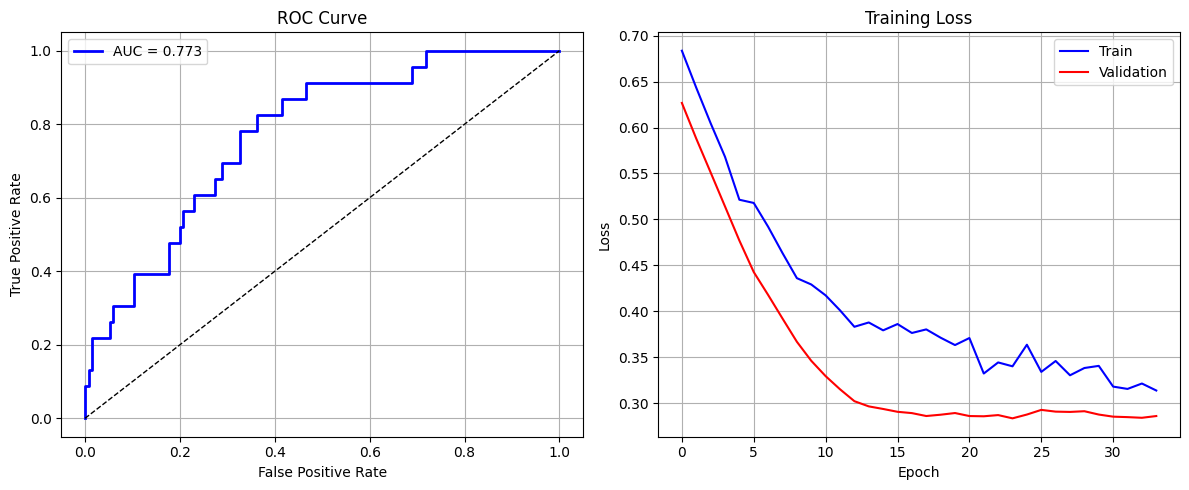

In [8]:

print("\nStep 1: Preparing LSTM data...")

def prepare_lstm_manual(data, sequence_length=3):
    # Select features that are likely to be numeric
    feature_cols = ['ECOGGRN', 'total_ae_events', 'serious_ae_count',
                   'grade3_plus_count', 'AGE', 'VISIT', 'EXDOSENN', 'EXDOSE2N', 'EXDOSE3N', 'PKSAMPN', 'TYPEPKN', 'TARGETQN', 'NONTARQN', 'total_ae_events', 'serious_ae_count', 'grade3_plus_count', 'total_body_systems', 'treatment_related_count', 'other_treatment_related_count', 'any_treatment_related', 'drug_interrupted', 'drug_reduced', 'drug_withdrawn', 'drug_not_changed', 'other_drug_interrupted', 'other_drug_reduced', 'other_drug_withdrawn', 'concomitant_treatment_given', 'grade1_count', 'grade2_count', 'grade3_count', 'grade4_count', 'grade5_count', 'ongoing_ae_count', 'mean_ae_duration', 'max_ae_duration', 'most_recent_ae_term', 'most_recent_ae_severity', 'cum_any_grade3_plus', 'cum_any_treatment_related', 'cum_drug_withdrawn', 'cum_other_drug_withdrawn', 'cum_concomitant_treatment']

    # Check which feature columns exist in the data
    available_features = [col for col in feature_cols if col in data.columns]
    print(f"Available features: {available_features}")

    # Prepare data
    data_prep = data.copy()

    # Create outcome variable (assuming CANCDEAD exists)
    if 'CANCDEAD' in data_prep.columns:
        data_prep['outcome'] = data_prep['CANCDEAD'].astype(int) - 1
    else:
        print("WARNING: CANCDEAD column not found. Creating dummy outcome.")
        data_prep['outcome'] = 0

    # Group by patient and count visits
    visit_counts = data_prep.groupby('RPT').size()
    valid_patients = visit_counts[visit_counts >= sequence_length].index

    data_prep = data_prep[data_prep['RPT'].isin(valid_patients)]

    # Convert features to numeric and fill NaN
    for col in available_features:
        data_prep[col] = pd.to_numeric(data_prep[col], errors='coerce')

    data_prep[available_features] = data_prep[available_features].fillna(0)

    patients = data_prep['RPT'].unique()
    sequences = []
    labels = []

    print(f"Processing {len(patients)} patients with sufficient visits...")

    for i, patient in enumerate(patients):
        patient_data = data_prep[data_prep['RPT'] == patient].sort_values('VISDAY')

        if len(patient_data) >= sequence_length:
            # Get the outcome (assuming it's constant per patient)
            patient_outcome = patient_data['outcome'].iloc[0]

            # Extract features as matrix
            feature_matrix = patient_data[available_features].values

            # Use the last 'sequence_length' time points
            sequence_data = feature_matrix[-sequence_length:, :]

            sequences.append(sequence_data)
            labels.append(patient_outcome)

        # Progress indicator
        if (i + 1) % 50 == 0:
            print(f"Processed {i + 1} patients...")

    print(f"Created {len(sequences)} sequences total")

    if len(sequences) == 0:
        raise ValueError("No sequences were created. Possible issues:\n"
                        f"- Not enough patients with {sequence_length} visits\n"
                        "- Feature columns may contain non-numeric data\n"
                        "- Check if CANCDEAD variable exists and has values")

    # Create 3D array using our manual function
    sequences_array = create_3d_array(sequences)

    return {
        'sequences': sequences_array,
        'labels': np.array(labels)
    }

# Prepare the data
try:
    lstm_data = prepare_lstm_manual(sequential_data, sequence_length=3)
    print("SUCCESS: LSTM data prepared!")
    print(f"Sequences dimension: {lstm_data['sequences'].shape}")
    print(f"Labels: {len(lstm_data['labels'])}")
    print(f"Class distribution - 0: {sum(lstm_data['labels'] == 0)} 1: {sum(lstm_data['labels'] == 1)}")

except Exception as e:
    print(f"ERROR in data preparation: {e}")

    # Diagnostic information
    print("\nDIAGNOSTIC INFORMATION:")
    print(f"Number of patients: {sequential_data['RPT'].nunique()}")
    print(f"Variables in sequential_data: {sequential_data.columns.tolist()}")
    if 'CANCDEAD' in sequential_data.columns:
        print(f"CANCDEAD values:\n{sequential_data['CANCDEAD'].value_counts()}")

    visit_counts = sequential_data.groupby('RPT').size()
    print("Visit counts summary:")
    print(visit_counts.describe())

print("\nStep 2: Normalizing data...")

def normalize_3d_manual(array_3d):
    dims = array_3d.shape
    print(f"Normalizing array with dimensions: {dims}")

    # Normalize each feature across all samples and timesteps
    for feature_idx in range(dims[2]):
        feature_data = array_3d[:, :, feature_idx]
        mean_val = np.mean(feature_data)
        sd_val = np.std(feature_data)

        if sd_val > 0:
            array_3d[:, :, feature_idx] = (feature_data - mean_val) / sd_val
        # If sd = 0, leave as is (constant feature)

    array_3d = np.nan_to_num(array_3d)
    return array_3d

if 'lstm_data' in locals():
    X_sequences = normalize_3d_manual(lstm_data['sequences'].copy())
    y = lstm_data['labels']

    print("Normalization completed!")
    print(f"Data range: [{X_sequences.min():.3f}, {X_sequences.max():.3f}]")
else:
    print("Cannot normalize - lstm_data not created")

print("\nStep 3: Creating train-test split...")

if 'X_sequences' in locals() and 'y' in locals():
    # Check if we have enough samples
    if len(y) < 10:
        print(f"Warning: Only {len(y)} samples available. Using 80% for training.")
        test_size = 0.2
    else:
        test_size = 0.3

    # Create stratified split
    X_train, X_test, y_train, y_test = train_test_split(
        X_sequences, y,
        test_size=test_size,
        random_state=123,
        stratify=y
    )

    print("Training set:")
    print(f"  Sequences: {X_train.shape}")
    print(f"  Labels: {len(y_train)} (0: {sum(y_train == 0)} 1: {sum(y_train == 1)})")

    print("Test set:")
    print(f"  Sequences: {X_test.shape}")
    print(f"  Labels: {len(y_test)} (0: {sum(y_test == 0)} 1: {sum(y_test == 1)})")
else:
    print("Cannot create split - data not available")

print("\nStep 4: Building LSTM model...")

def build_lstm_model_simple(sequence_length, n_features):
    # Simple LSTM model
    model = Sequential([
        LSTM(32, input_shape=(sequence_length, n_features), return_sequences=False),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    # Compile model
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy', 'AUC']
    )

    return model

if 'X_train' in locals() and 'y_train' in locals():
    # Get model dimensions
    sequence_length = X_train.shape[1]
    n_features = X_train.shape[2]

    print("Building model for:")
    print(f"  Sequence length: {sequence_length}")
    print(f"  Features: {n_features}")
    print(f"  Training samples: {X_train.shape[0]}")

    # Build model
    lstm_model = build_lstm_model_simple(sequence_length, n_features)

    print("Model architecture:")
    lstm_model.summary()

    print("\nStep 5: Training LSTM model...")

    early_stopping = EarlyStopping(
        patience=10,
        restore_best_weights=True,
        monitor='val_loss'
    )

    history = lstm_model.fit(
        x=X_train,
        y=y_train,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        verbose=1,
        callbacks=[early_stopping]
    )

    print("Training completed!")

else:
    print("Cannot build model - training data not available")

print("\nStep 6: Evaluating LSTM model...")

if 'lstm_model' in locals() and 'X_test' in locals() and 'y_test' in locals():
    # Make predictions
    predictions = lstm_model.predict(X_test)
    predicted_probs = predictions.flatten()

    # Convert to binary predictions
    predicted_classes = (predicted_probs > 0.5).astype(int)

    # Calculate metrics
    conf_matrix = confusion_matrix(y_test, predicted_classes)
    accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)

    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # AUC
    if len(np.unique(y_test)) > 1:
        auc_val = roc_auc_score(y_test, predicted_probs)
    else:
        auc_val = np.nan

    # Print results
    print("=" * 50)
    print("LSTM MODEL PERFORMANCE")
    print("=" * 50)
    print(f"Accuracy:    {accuracy:.3f}")
    print(f"Sensitivity: {sensitivity:.3f}")
    print(f"Specificity: {specificity:.3f}")
    print(f"AUC:         {auc_val:.3f}")
    print(f"\nConfusion Matrix:")
    print(conf_matrix)
    print(f"\nClassification Report:")
    print(classification_report(y_test, predicted_classes))

    # Plot results if we have AUC
    if not np.isnan(auc_val):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # ROC curve
        fpr, tpr, _ = roc_curve(y_test, predicted_probs)
        ax1.plot(fpr, tpr, 'b-', linewidth=2, label=f'AUC = {auc_val:.3f}')
        ax1.plot([0, 1], [0, 1], 'k--', linewidth=1)
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.set_title('ROC Curve')
        ax1.legend()
        ax1.grid(True)

        # Training history
        if 'history' in locals():
            ax2.plot(history.history['loss'], 'b-', label='Train')
            if 'val_loss' in history.history:
                ax2.plot(history.history['val_loss'], 'r-', label='Validation')
            ax2.set_xlabel('Epoch')
            ax2.set_ylabel('Loss')
            ax2.set_title('Training Loss')
            ax2.legend()
            ax2.grid(True)

        plt.tight_layout()
        plt.show()

else:
    print("Cannot evaluate - model or test data not available")

Step 0: Setting up environment...
Environment setup complete!
Loading pcdata.csv...
Data loaded successfully! Shape: (8121, 101)

Step 1: Improved LSTM data preparation with better feature selection...
Selected 14 essential features
Features: ['AGE', 'ECOGGRN', 'EXDOSENN', 'TARGETQN', 'NONTARQN', 'total_ae_events', 'serious_ae_count', 'grade3_plus_count', 'grade3_count', 'grade4_count', 'grade5_count', 'drug_withdrawn', 'concomitant_treatment_given', 'VISDAY']
Outcome distribution: {0: 7051, 1: 1070}
Patients with sufficient visits: 525
  AGE: median=68.000, missing=0
  ECOGGRN: median=1.000, missing=0
  EXDOSENN: median=1.000, missing=0
  TARGETQN: median=1.000, missing=0
  NONTARQN: median=1.000, missing=0
  total_ae_events: median=7.000, missing=0
  serious_ae_count: median=0.000, missing=0
  grade3_plus_count: median=0.000, missing=0
  grade3_count: median=0.000, missing=0
  grade4_count: median=0.000, missing=0
  grade5_count: median=0.000, missing=0
  drug_withdrawn: median=0.000

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 32)             │         6,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,753 (26.38 KB)

 Trainable params: 6,721 (26.25 KB)

 Non-trainable params: 32 (128.00 B)


Step 5: Training LSTM model with careful monitoring...
Starting training...
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 0.4302 - accuracy: 0.6554 - loss: 0.8703 - val_AUC: 0.7860 - val_accuracy: 0.6351 - val_loss: 0.6860 - learning_rate: 0.0010
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5971 - accuracy: 0.6619 - loss: 0.7475 - val_AUC: 0.7576 - val_accuracy: 0.3649 - val_loss: 0.6966 - learning_rate: 0.0010
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6488 - accuracy: 0.7137 - loss: 0.5893 - val_AUC: 0.6903 - val_accuracy: 0.3784 - val_loss: 0.6978 - learning_rate: 0.0010
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5825 - accuracy: 0.6508 - loss: 0.8086 - val_AUC: 0.6591 - val_accuracy: 0.3378 - val_loss: 0.6996 - learning_rate: 0.0010
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.7651 - accuracy: 0.6663 - loss: 0.6172 - val_AUC: 0.6297 - val_accuracy: 0.3243 - val_loss: 0.6995 - learning_rate: 0.0010
Epoch 

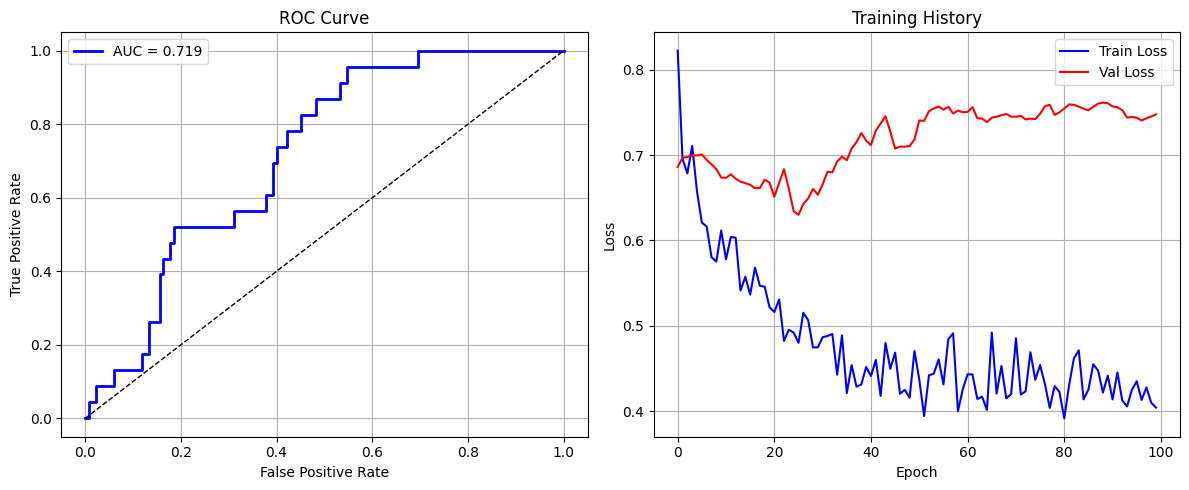


Step 7: Data quality summary...
Data Quality Report:
Total sequences: 525
Feature count: 14
Class balance: [449  76]
Sequence length: 3
Data statistics:
  Min: 0.000
  Max: 750.000
  Mean: 24.249
  Std: 74.058
  NaN values: 0
  Inf values: 0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.feature_selection import VarianceThreshold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("Step 0: Setting up environment...")

# Manual 3D array creation function
def create_3d_array(matrix_list):
    if len(matrix_list) == 0:
        raise ValueError("No matrices provided")

    # Get dimensions from first matrix
    n_samples = len(matrix_list)
    n_timesteps = matrix_list[0].shape[0]
    n_features = matrix_list[0].shape[1]

    # Create empty 3D array
    array_3d = np.zeros((n_samples, n_timesteps, n_features))

    # Fill array
    for i in range(n_samples):
        array_3d[i, :, :] = matrix_list[i]

    return array_3d

print("Environment setup complete!")

# Load the data
print("Loading pcdata.csv...")
try:
    sequential_data = pd.read_csv('pcdata.csv')
    print(f"Data loaded successfully! Shape: {sequential_data.shape}")
except FileNotFoundError:
    print("ERROR: pcdata.csv file not found.")
    exit()

print("\nStep 1: Improved LSTM data preparation with better feature selection...")

def prepare_lstm_improved(data, sequence_length=3):
    # Select only the most relevant and clean features
    essential_features = [
        # Demographic
        'AGE', 'ECOGGRN',
        # Dosing
        'EXDOSENN',
        # Tumor response
        'TARGETQN', 'NONTARQN',
        # AE counts (most important)
        'total_ae_events', 'serious_ae_count', 'grade3_plus_count',
        'grade3_count', 'grade4_count', 'grade5_count',
        # Treatment impact
        'drug_withdrawn', 'concomitant_treatment_given',
        # Time
        'VISDAY'
    ]

    # Check which feature columns exist in the data
    available_features = [col for col in essential_features if col in data.columns]
    print(f"Selected {len(available_features)} essential features")
    print(f"Features: {available_features}")

    # Prepare data
    data_prep = data.copy()

    # Create outcome variable
    if 'CANCDEAD' in data_prep.columns:
        data_prep['outcome'] = data_prep['CANCDEAD'].astype(int)
        # Ensure binary outcome (0, 1)
        if data_prep['outcome'].min() < 0:
            data_prep['outcome'] = (data_prep['outcome'] > 0).astype(int)
        print(f"Outcome distribution: {data_prep['outcome'].value_counts().to_dict()}")
    else:
        print("WARNING: CANCDEAD column not found.")
        return None

    # Remove patients with insufficient visits
    visit_counts = data_prep.groupby('RPT').size()
    valid_patients = visit_counts[visit_counts >= sequence_length].index
    data_prep = data_prep[data_prep['RPT'].isin(valid_patients)]

    print(f"Patients with sufficient visits: {len(valid_patients)}")

    # Convert features to numeric and handle missing values robustly
    for col in available_features:
        data_prep[col] = pd.to_numeric(data_prep[col], errors='coerce')
        # Use median imputation
        median_val = data_prep[col].median()
        data_prep[col] = data_prep[col].fillna(median_val)
        print(f"  {col}: median={median_val:.3f}, missing={data_prep[col].isna().sum()}")

    # Remove constant features
    constant_features = []
    for col in available_features:
        if data_prep[col].nunique() <= 1:
            constant_features.append(col)

    if constant_features:
        print(f"Removing constant features: {constant_features}")
        available_features = [f for f in available_features if f not in constant_features]

    patients = data_prep['RPT'].unique()
    sequences = []
    labels = []

    print(f"Processing {len(patients)} patients...")

    for i, patient in enumerate(patients):
        patient_data = data_prep[data_prep['RPT'] == patient].sort_values('VISDAY')

        if len(patient_data) >= sequence_length:
            patient_outcome = patient_data['outcome'].iloc[0]
            feature_matrix = patient_data[available_features].values

            # Use the last 'sequence_length' time points
            sequence_data = feature_matrix[-sequence_length:, :]

            sequences.append(sequence_data)
            labels.append(patient_outcome)

        if (i + 1) % 50 == 0:
            print(f"Processed {i + 1} patients...")

    print(f"Created {len(sequences)} sequences")

    if len(sequences) == 0:
        raise ValueError("No sequences created")

    # Create 3D array
    sequences_array = create_3d_array(sequences)

    return {
        'sequences': sequences_array,
        'labels': np.array(labels),
        'feature_names': available_features
    }

# Prepare the data
try:
    lstm_data = prepare_lstm_improved(sequential_data, sequence_length=3)
    if lstm_data is None:
        raise ValueError("Data preparation failed")

    print("SUCCESS: LSTM data prepared!")
    print(f"Sequences dimension: {lstm_data['sequences'].shape}")
    print(f"Labels: {len(lstm_data['labels'])}")
    print(f"Class distribution - 0: {sum(lstm_data['labels'] == 0)} 1: {sum(lstm_data['labels'] == 1)}")

except Exception as e:
    print(f"ERROR in data preparation: {e}")
    exit()

print("\nStep 2: Robust normalization with NaN handling...")

def robust_normalize_3d(array_3d, feature_names):
    dims = array_3d.shape
    print(f"Normalizing array with dimensions: {dims}")

    n_samples, n_timesteps, n_features = dims
    X_reshaped = array_3d.reshape(n_samples * n_timesteps, n_features)

    # Check for NaN and infinite values
    print(f"NaN values before cleaning: {np.isnan(X_reshaped).sum()}")
    print(f"Inf values before cleaning: {np.isinf(X_reshaped).sum()}")

    # Replace any remaining NaN/Inf with 0
    X_reshaped = np.nan_to_num(X_reshaped, nan=0.0, posinf=0.0, neginf=0.0)

    # Use RobustScaler which is less sensitive to outliers
    scaler = RobustScaler()
    X_normalized = scaler.fit_transform(X_reshaped)

    # Check for any issues after scaling
    if np.isnan(X_normalized).any() or np.isinf(X_normalized).any():
        print("WARNING: NaN/Inf values after scaling. Using fallback normalization.")
        # Fallback: manual robust normalization
        X_normalized = np.zeros_like(X_reshaped)
        for i in range(n_features):
            feature_data = X_reshaped[:, i]
            median = np.median(feature_data)
            iqr = np.percentile(feature_data, 75) - np.percentile(feature_data, 25)
            if iqr > 0:
                X_normalized[:, i] = (feature_data - median) / iqr
            else:
                # Constant feature, just center
                X_normalized[:, i] = feature_data - median

    # Reshape back to 3D
    array_3d_normalized = X_normalized.reshape(n_samples, n_timesteps, n_features)

    print(f"Normalization completed! Data range: [{array_3d_normalized.min():.3f}, {array_3d_normalized.max():.3f}]")
    print(f"NaN values after normalization: {np.isnan(array_3d_normalized).sum()}")

    return array_3d_normalized, scaler

if 'lstm_data' in locals():
    X_sequences, scaler = robust_normalize_3d(lstm_data['sequences'].copy(),
                                            lstm_data.get('feature_names'))
    y = lstm_data['labels']

    print(f"Final label distribution: 0: {sum(y == 0)}, 1: {sum(y == 1)}")
else:
    print("Cannot normalize - lstm_data not created")
    exit()

print("\nStep 3: Creating train-test split...")

if 'X_sequences' in locals() and 'y' in locals():
    # Final check for NaN
    if np.isnan(X_sequences).any():
        print("WARNING: NaN values detected in sequences. Replacing with 0.")
        X_sequences = np.nan_to_num(X_sequences)

    # Create stratified split
    X_train, X_test, y_train, y_test = train_test_split(
        X_sequences, y,
        test_size=0.3,
        random_state=42,  # Changed seed for different split
        stratify=y
    )

    print("Training set:")
    print(f"  Sequences: {X_train.shape}")
    print(f"  Labels: {len(y_train)} (0: {sum(y_train == 0)} 1: {sum(y_train == 1)})")

    print("Test set:")
    print(f"  Sequences: {X_test.shape}")
    print(f"  Labels: {len(y_test)} (0: {sum(y_test == 0)} 1: {sum(y_test == 1)})")

else:
    print("Cannot create split - data not available")
    exit()

print("\nStep 4: Building robust LSTM model...")

def build_robust_lstm_model(sequence_length, n_features):
    # Simpler, more robust model
    model = Sequential([
        LSTM(32,
             input_shape=(sequence_length, n_features),
             return_sequences=False,
             kernel_initializer='glorot_uniform',
             recurrent_initializer='orthogonal'),
        Dropout(0.3),

        Dense(16, activation='relu', kernel_initializer='he_normal'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(8, activation='relu', kernel_initializer='he_normal'),
        Dropout(0.1),

        Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')
    ])

    # Use a conservative optimizer
    optimizer = Adam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-7,
        clipnorm=1.0  # Gradient clipping
    )

    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy', 'AUC']
    )

    return model

if 'X_train' in locals() and 'y_train' in locals():
    # Get model dimensions
    sequence_length = X_train.shape[1]
    n_features = X_train.shape[2]

    print("Building model for:")
    print(f"  Sequence length: {sequence_length}")
    print(f"  Features: {n_features}")
    print(f"  Training samples: {X_train.shape[0]}")

    # Calculate class weights
    class_counts = np.bincount(y_train)
    if len(class_counts) > 1:
        total = len(y_train)
        class_weights = {
            0: total / (2 * class_counts[0]),
            1: total / (2 * class_counts[1])
        }
        print(f"Class weights: {class_weights}")
    else:
        class_weights = {0: 1, 1: 1}
        print("Using equal class weights")

    # Build model
    lstm_model = build_robust_lstm_model(sequence_length, n_features)

    print("Model architecture:")
    lstm_model.summary()

    print("\nStep 5: Training LSTM model with careful monitoring...")

    # Enhanced callbacks
    early_stopping = EarlyStopping(
        monitor='val_auc' if len(np.unique(y_train)) > 1 else 'val_loss',
        patience=20,
        restore_best_weights=True,
        mode='max' if len(np.unique(y_train)) > 1 else 'min',
        verbose=1,
        min_delta=0.001
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=1e-7,
        verbose=1,
        min_delta=0.001
    )

    # Prepare validation data
    if len(np.unique(y_train)) > 1:
        # Use proper validation split
        val_split = 0.2
    else:
        val_split = 0.0

    print("Starting training...")

    try:
        history = lstm_model.fit(
            x=X_train,
            y=y_train,
            epochs=100,
            batch_size=16,
            validation_split=val_split,
            class_weight=class_weights,
            verbose=1,
            callbacks=[early_stopping, reduce_lr],
            shuffle=True
        )

        print("Training completed successfully!")

    except Exception as e:
        print(f"Training failed: {e}")
        print("Trying with simpler configuration...")

        # Fallback training
        history = lstm_model.fit(
            x=X_train,
            y=y_train,
            epochs=50,
            batch_size=32,
            validation_split=0.0,
            verbose=1,
            shuffle=True
        )

else:
    print("Cannot build model - training data not available")
    exit()

print("\nStep 6: Evaluating LSTM model...")

if 'lstm_model' in locals() and 'X_test' in locals() and 'y_test' in locals():
    try:
        # Make predictions
        predictions = lstm_model.predict(X_test, verbose=0)
        predicted_probs = predictions.flatten()

        # Check for NaN in predictions
        if np.isnan(predicted_probs).any():
            print("WARNING: NaN in predictions. Using fallback.")
            predicted_probs = np.zeros_like(predicted_probs) + 0.5

        # Convert to binary predictions
        threshold = 0.5
        predicted_classes = (predicted_probs > threshold).astype(int)

        # Calculate metrics
        conf_matrix = confusion_matrix(y_test, predicted_classes)
        accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)

        if conf_matrix.shape == (2, 2):
            tn, fp, fn, tp = conf_matrix.ravel()
            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        else:
            sensitivity = specificity = precision = accuracy

        # AUC
        if len(np.unique(y_test)) > 1:
            try:
                auc_val = roc_auc_score(y_test, predicted_probs)
            except:
                auc_val = 0.5
        else:
            auc_val = 0.5

        # Print results
        print("=" * 60)
        print("ROBUST LSTM MODEL PERFORMANCE")
        print("=" * 60)
        print(f"Accuracy:    {accuracy:.3f}")
        print(f"Sensitivity: {sensitivity:.3f}")
        print(f"Specificity: {specificity:.3f}")
        print(f"Precision:   {precision:.3f}")
        print(f"AUC:         {auc_val:.3f}")
        print(f"\nConfusion Matrix:")
        print(conf_matrix)

        if len(np.unique(y_test)) > 1:
            print(f"\nClassification Report:")
            print(classification_report(y_test, predicted_classes,
                                      target_names=['Class 0', 'Class 1']))

        # Plot results
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # ROC curve
        if len(np.unique(y_test)) > 1:
            fpr, tpr, _ = roc_curve(y_test, predicted_probs)
            axes[0].plot(fpr, tpr, 'b-', linewidth=2, label=f'AUC = {auc_val:.3f}')
            axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1)
            axes[0].set_xlabel('False Positive Rate')
            axes[0].set_ylabel('True Positive Rate')
            axes[0].set_title('ROC Curve')
            axes[0].legend()
            axes[0].grid(True)
        else:
            axes[0].text(0.5, 0.5, 'Single class\nNo ROC curve',
                        ha='center', va='center', transform=axes[0].transAxes)
            axes[0].set_title('ROC Curve')

        # Training history (if available)
        if 'history' in locals() and 'loss' in history.history:
            axes[1].plot(history.history['loss'], 'b-', label='Train Loss')
            if 'val_loss' in history.history and len(history.history['val_loss']) > 0:
                axes[1].plot(history.history['val_loss'], 'r-', label='Val Loss')
            axes[1].set_xlabel('Epoch')
            axes[1].set_ylabel('Loss')
            axes[1].set_title('Training History')
            axes[1].legend()
            axes[1].grid(True)
        else:
            axes[1].text(0.5, 0.5, 'No training history\navailable',
                        ha='center', va='center', transform=axes[1].transAxes)
            axes[1].set_title('Training History')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error in evaluation: {e}")
        print("This indicates the model didn't train properly.")

else:
    print("Cannot evaluate - model or test data not available")

print("\nStep 7: Data quality summary...")
if 'lstm_data' in locals():
    print("Data Quality Report:")
    print(f"Total sequences: {len(lstm_data['labels'])}")
    print(f"Feature count: {lstm_data['sequences'].shape[2]}")
    print(f"Class balance: {np.bincount(lstm_data['labels'])}")
    print(f"Sequence length: {lstm_data['sequences'].shape[1]}")

    # Check data statistics
    X_flat = lstm_data['sequences'].reshape(-1, lstm_data['sequences'].shape[2])
    print(f"Data statistics:")
    print(f"  Min: {X_flat.min():.3f}")
    print(f"  Max: {X_flat.max():.3f}")
    print(f"  Mean: {X_flat.mean():.3f}")
    print(f"  Std: {X_flat.std():.3f}")
    print(f"  NaN values: {np.isnan(X_flat).sum()}")
    print(f"  Inf values: {np.isinf(X_flat).sum()}")

Step 0: Setting up environment...
Environment setup complete!
Loading pcdata.csv...
Data loaded successfully! Shape: (8121, 101)

Step 1: Enhanced LSTM data preparation...
Selected 14 clinical features
Features: ['AGE', 'ECOGGRN', 'EXDOSENN', 'TARGETQN', 'NONTARQN', 'total_ae_events', 'serious_ae_count', 'grade3_plus_count', 'grade3_count', 'grade4_count', 'grade5_count', 'drug_withdrawn', 'concomitant_treatment_given', 'VISDAY']
Outcome distribution: {0: 7051, 1: 1070}
Patients with sufficient visits: 525
  AGE: median=68.000
  ECOGGRN: median=1.000
  EXDOSENN: median=1.000
  TARGETQN: median=1.000
  NONTARQN: median=1.000
  total_ae_events: median=7.000
  serious_ae_count: median=0.000
  grade3_plus_count: median=0.000
  grade3_count: median=0.000
  grade4_count: median=0.000
  grade5_count: median=0.000
  drug_withdrawn: median=0.000
  concomitant_treatment_given: median=1.000
  VISDAY: median=106.000
Processing 525 patients...
Processed 50 patients...
Processed 100 patients...
Proc

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 3, 32)          │           928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 3, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 3, 64)          │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 3, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,417 (157.88 KB)

 Trainable params: 40,097 (156.63 KB)

 Non-trainable params: 320 (1.25 KB)


Step 5: Enhanced training with validation...
Starting enhanced training...
Epoch 1/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5582 - accuracy: 0.6176 - loss: 0.7362 - precision: 0.1684 - recall: 0.5407

20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 89ms/step - AUC: 0.5606 - accuracy: 0.6173 - loss: 0.7469 - precision: 0.1737 - recall: 0.5284 - val_AUC: 0.6872 - val_accuracy: 0.8228 - val_loss: 0.6965 - val_precision: 0.3333 - val_recall: 0.2727 - learning_rate: 0.0010
Epoch 2/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5959 - accuracy: 0.5576 - loss: 0.7752 - precision: 0.1681 - recall: 0.5837

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.5927 - accuracy: 0.5588 - loss: 0.7778 - precision: 0.1683 - recall: 0.5758 - val_AUC: 0.5354 - val_accuracy: 0.7089 - val_loss: 0.6962 - val_precision: 0.1667 - val_recall: 0.2727 - learning_rate: 0.0010
Epoch 3/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6367 - accuracy: 0.6381 - loss: 0.7734 - precision: 0.2605 - recall: 0.6000

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6251 - accuracy: 0.6330 - loss: 0.7710 - precision: 0.2464 - recall: 0.5865 - val_AUC: 0.5702 - val_accuracy: 0.7595 - val_loss: 0.6933 - val_precision: 0.2500 - val_recall: 0.3636 - learning_rate: 0.0010
Epoch 4/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.4759 - accuracy: 0.5623 - loss: 0.7053 - precision: 0.1124 - recall: 0.3923

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.4939 - accuracy: 0.5646 - loss: 0.7205 - precision: 0.1261 - recall: 0.4187 - val_AUC: 0.6725 - val_accuracy: 0.7848 - val_loss: 0.6878 - val_precision: 0.2500 - val_recall: 0.2727 - learning_rate: 0.0010
Epoch 5/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5192 - accuracy: 0.5992 - loss: 0.8459 - precision: 0.1577 - recall: 0.3832

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.5402 - accuracy: 0.6028 - loss: 0.8182 - precision: 0.1622 - recall: 0.4021 - val_AUC: 0.6718 - val_accuracy: 0.7975 - val_loss: 0.6793 - val_precision: 0.3077 - val_recall: 0.3636 - learning_rate: 0.0010
Epoch 6/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5971 - accuracy: 0.6105 - loss: 0.7867 - precision: 0.2518 - recall: 0.6104

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.5919 - accuracy: 0.6093 - loss: 0.7783 - precision: 0.2371 - recall: 0.5930 - val_AUC: 0.6718 - val_accuracy: 0.8101 - val_loss: 0.6777 - val_precision: 0.3571 - val_recall: 0.4545 - learning_rate: 0.0010
Epoch 7/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6271 - accuracy: 0.5755 - loss: 0.6734 - precision: 0.1794 - recall: 0.5654

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6262 - accuracy: 0.5789 - loss: 0.6753 - precision: 0.1798 - recall: 0.5571 - val_AUC: 0.6624 - val_accuracy: 0.6203 - val_loss: 0.6831 - val_precision: 0.1935 - val_recall: 0.5455 - learning_rate: 0.0010
Epoch 8/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6751 - accuracy: 0.6106 - loss: 0.6916 - precision: 0.2225 - recall: 0.6494

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6618 - accuracy: 0.6031 - loss: 0.6989 - precision: 0.2138 - recall: 0.6234 - val_AUC: 0.6778 - val_accuracy: 0.6456 - val_loss: 0.6789 - val_precision: 0.2258 - val_recall: 0.6364 - learning_rate: 0.0010
Epoch 9/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6612 - accuracy: 0.5965 - loss: 0.6767 - precision: 0.2000 - recall: 0.6664

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6715 - accuracy: 0.6025 - loss: 0.6692 - precision: 0.2071 - recall: 0.6737 - val_AUC: 0.6638 - val_accuracy: 0.6076 - val_loss: 0.6822 - val_precision: 0.2059 - val_recall: 0.6364 - learning_rate: 0.0010
Epoch 10/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7236 - accuracy: 0.6658 - loss: 0.6103 - precision: 0.2363 - recall: 0.6382

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.7099 - accuracy: 0.6546 - loss: 0.6256 - precision: 0.2292 - recall: 0.6199 - val_AUC: 0.6664 - val_accuracy: 0.5823 - val_loss: 0.6854 - val_precision: 0.1944 - val_recall: 0.6364 - learning_rate: 0.0010
Epoch 11/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6957 - accuracy: 0.6052 - loss: 0.6617 - precision: 0.2221 - recall: 0.6073

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.7026 - accuracy: 0.6097 - loss: 0.6501 - precision: 0.2238 - recall: 0.6210 - val_AUC: 0.6825 - val_accuracy: 0.5570 - val_loss: 0.6843 - val_precision: 0.2000 - val_recall: 0.7273 - learning_rate: 0.0010
Epoch 12/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.7454 - accuracy: 0.6583 - loss: 0.5963 - precision: 0.2593 - recall: 0.7078

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.7356 - accuracy: 0.6546 - loss: 0.6028 - precision: 0.2550 - recall: 0.7023 - val_AUC: 0.6959 - val_accuracy: 0.5949 - val_loss: 0.6781 - val_precision: 0.2162 - val_recall: 0.7273 - learning_rate: 0.0010
Epoch 13/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7071 - accuracy: 0.6388 - loss: 0.6581 - precision: 0.2482 - recall: 0.6860

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.7087 - accuracy: 0.6387 - loss: 0.6523 - precision: 0.2465 - recall: 0.6900 - val_AUC: 0.7152 - val_accuracy: 0.5823 - val_loss: 0.6686 - val_precision: 0.2105 - val_recall: 0.7273 - learning_rate: 0.0010
Epoch 14/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7668 - accuracy: 0.6645 - loss: 0.6440 - precision: 0.3076 - recall: 0.8258

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.7650 - accuracy: 0.6631 - loss: 0.6372 - precision: 0.3015 - recall: 0.8209 - val_AUC: 0.7393 - val_accuracy: 0.6076 - val_loss: 0.6527 - val_precision: 0.2222 - val_recall: 0.7273 - learning_rate: 0.0010
Epoch 15/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7401 - accuracy: 0.6168 - loss: 0.7174 - precision: 0.2835 - recall: 0.7952

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.7396 - accuracy: 0.6166 - loss: 0.7135 - precision: 0.2817 - recall: 0.7957 - val_AUC: 0.7567 - val_accuracy: 0.5696 - val_loss: 0.6584 - val_precision: 0.2195 - val_recall: 0.8182 - learning_rate: 0.0010
Epoch 16/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7319 - accuracy: 0.7067 - loss: 0.5977 - precision: 0.2772 - recall: 0.6671

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 0.7320 - accuracy: 0.7043 - loss: 0.5990 - precision: 0.2770 - recall: 0.6719 - val_AUC: 0.7614 - val_accuracy: 0.5823 - val_loss: 0.6411 - val_precision: 0.2250 - val_recall: 0.8182 - learning_rate: 0.0010
Epoch 17/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.7914 - accuracy: 0.6636 - loss: 0.5575 - precision: 0.2872 - recall: 0.7679

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - AUC: 0.7863 - accuracy: 0.6611 - loss: 0.5629 - precision: 0.2826 - recall: 0.7589 - val_AUC: 0.8041 - val_accuracy: 0.6203 - val_loss: 0.6251 - val_precision: 0.2564 - val_recall: 0.9091 - learning_rate: 0.0010
Epoch 18/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.7184 - accuracy: 0.6385 - loss: 0.5806 - precision: 0.2244 - recall: 0.7916

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - AUC: 0.7245 - accuracy: 0.6365 - loss: 0.5865 - precision: 0.2284 - recall: 0.7903 - val_AUC: 0.8182 - val_accuracy: 0.6456 - val_loss: 0.6088 - val_precision: 0.2703 - val_recall: 0.9091 - learning_rate: 0.0010
Epoch 19/150
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.7595 - accuracy: 0.6380 - loss: 0.5601 - precision: 0.2367 - recall: 0.7804

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 0.7490 - accuracy: 0.6362 - loss: 0.5719 - precision: 0.2359 - recall: 0.7610 - val_AUC: 0.8082 - val_accuracy: 0.6076 - val_loss: 0.6161 - val_precision: 0.2500 - val_recall: 0.9091 - learning_rate: 0.0010
Epoch 20/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7478 - accuracy: 0.6416 - loss: 0.5857 - precision: 0.2432 - recall: 0.7271

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.7528 - accuracy: 0.6434 - loss: 0.5828 - precision: 0.2465 - recall: 0.7345 - val_AUC: 0.8108 - val_accuracy: 0.6329 - val_loss: 0.6058 - val_precision: 0.2632 - val_recall: 0.9091 - learning_rate: 0.0010
Epoch 21/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.7429 - accuracy: 0.6587 - loss: 0.6509 - precision: 0.3199 - recall: 0.7789

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.7422 - accuracy: 0.6514 - loss: 0.6385 - precision: 0.3014 - recall: 0.7690 - val_AUC: 0.8001 - val_accuracy: 0.6329 - val_loss: 0.6105 - val_precision: 0.2632 - val_recall: 0.9091 - learning_rate: 0.0010
Epoch 22/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7335 - accuracy: 0.6176 - loss: 0.6487 - precision: 0.2608 - recall: 0.7231

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.7357 - accuracy: 0.6191 - loss: 0.6438 - precision: 0.2603 - recall: 0.7288 - val_AUC: 0.7868 - val_accuracy: 0.6456 - val_loss: 0.6213 - val_precision: 0.2703 - val_recall: 0.9091 - learning_rate: 0.0010
Epoch 23/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7805 - accuracy: 0.6143 - loss: 0.4811 - precision: 0.2087 - recall: 0.8018

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.7933 - accuracy: 0.6257 - loss: 0.4862 - precision: 0.2271 - recall: 0.8215 - val_AUC: 0.7934 - val_accuracy: 0.6456 - val_loss: 0.5957 - val_precision: 0.2703 - val_recall: 0.9091 - learning_rate: 0.0010
Epoch 24/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.7274 - accuracy: 0.6649 - loss: 0.6274 - precision: 0.2343 - recall: 0.6784

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.7204 - accuracy: 0.6615 - loss: 0.6370 - precision: 0.2322 - recall: 0.6561 - val_AUC: 0.7761 - val_accuracy: 0.6329 - val_loss: 0.5700 - val_precision: 0.2632 - val_recall: 0.9091 - learning_rate: 0.0010
Epoch 25/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7824 - accuracy: 0.6612 - loss: 0.5490 - precision: 0.2587 - recall: 0.8234

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.7812 - accuracy: 0.6564 - loss: 0.5529 - precision: 0.2598 - recall: 0.8214 - val_AUC: 0.7620 - val_accuracy: 0.6203 - val_loss: 0.5763 - val_precision: 0.2564 - val_recall: 0.9091 - learning_rate: 0.0010
Epoch 26/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7969 - accuracy: 0.6487 - loss: 0.5386 - precision: 0.2760 - recall: 0.8290

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.7905 - accuracy: 0.6484 - loss: 0.5458 - precision: 0.2741 - recall: 0.8211 - val_AUC: 0.7874 - val_accuracy: 0.6456 - val_loss: 0.5893 - val_precision: 0.2703 - val_recall: 0.9091 - learning_rate: 0.0010
Epoch 27/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8057 - accuracy: 0.6368 - loss: 0.5639 - precision: 0.2879 - recall: 0.7577

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8075 - accuracy: 0.6384 - loss: 0.5581 - precision: 0.2854 - recall: 0.7673 - val_AUC: 0.7587 - val_accuracy: 0.6456 - val_loss: 0.6117 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 0.0010
Epoch 28/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7602 - accuracy: 0.6558 - loss: 0.6227 - precision: 0.3047 - recall: 0.8021

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.7637 - accuracy: 0.6574 - loss: 0.6154 - precision: 0.3035 - recall: 0.8085 - val_AUC: 0.7533 - val_accuracy: 0.6329 - val_loss: 0.6260 - val_precision: 0.2632 - val_recall: 0.9091 - learning_rate: 0.0010
Epoch 29/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8221 - accuracy: 0.6718 - loss: 0.5038 - precision: 0.2744 - recall: 0.7863

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8187 - accuracy: 0.6709 - loss: 0.5084 - precision: 0.2745 - recall: 0.7880 - val_AUC: 0.7460 - val_accuracy: 0.6076 - val_loss: 0.6614 - val_precision: 0.2368 - val_recall: 0.8182 - learning_rate: 0.0010
Epoch 30/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7643 - accuracy: 0.6409 - loss: 0.6396 - precision: 0.2989 - recall: 0.7385

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.7655 - accuracy: 0.6402 - loss: 0.6358 - precision: 0.2969 - recall: 0.7427 - val_AUC: 0.7253 - val_accuracy: 0.6203 - val_loss: 0.6652 - val_precision: 0.2564 - val_recall: 0.9091 - learning_rate: 0.0010
Epoch 31/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.7944 - accuracy: 0.6574 - loss: 0.5148 - precision: 0.2430 - recall: 0.8210

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.7938 - accuracy: 0.6581 - loss: 0.5225 - precision: 0.2490 - recall: 0.8194 - val_AUC: 0.7253 - val_accuracy: 0.6203 - val_loss: 0.6227 - val_precision: 0.2564 - val_recall: 0.9091 - learning_rate: 0.0010
Epoch 32/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8152 - accuracy: 0.6734 - loss: 0.5250 - precision: 0.2960 - recall: 0.8301

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8162 - accuracy: 0.6735 - loss: 0.5238 - precision: 0.2959 - recall: 0.8319 - val_AUC: 0.7366 - val_accuracy: 0.6203 - val_loss: 0.6353 - val_precision: 0.2564 - val_recall: 0.9091 - learning_rate: 0.0010
Epoch 33/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8099 - accuracy: 0.6718 - loss: 0.5128 - precision: 0.3039 - recall: 0.8366

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8083 - accuracy: 0.6707 - loss: 0.5127 - precision: 0.2987 - recall: 0.8341 - val_AUC: 0.7507 - val_accuracy: 0.6329 - val_loss: 0.6336 - val_precision: 0.2632 - val_recall: 0.9091 - learning_rate: 0.0010
Epoch 34/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7396 - accuracy: 0.6430 - loss: 0.6848 - precision: 0.2988 - recall: 0.8678
Epoch 34: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.7452 - accuracy: 0.6452 - loss: 0.6746 - precision: 0.2980 - recall: 0.8701 - val_AUC: 0.7340 - val_accuracy: 0.6203 - val_loss: 0.6293 - val_precision: 0.2564 - val_recall: 0.9091 - learning_rate: 0.0010
Epoch 35/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8023 - accuracy: 0.7079 - loss: 0.5112 - precision: 0.3287 - recall: 0.9159

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.8110 - accuracy: 0.7099 - loss: 0.5053 - precision: 0.3278 - recall: 0.9084 - val_AUC: 0.7279 - val_accuracy: 0.6203 - val_loss: 0.6284 - val_precision: 0.2564 - val_recall: 0.9091 - learning_rate: 5.0000e-04
Epoch 36/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8434 - accuracy: 0.6594 - loss: 0.4880 - precision: 0.2691 - recall: 0.8598

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8406 - accuracy: 0.6603 - loss: 0.4913 - precision: 0.2708 - recall: 0.8587 - val_AUC: 0.7326 - val_accuracy: 0.6456 - val_loss: 0.6286 - val_precision: 0.2703 - val_recall: 0.9091 - learning_rate: 5.0000e-04
Epoch 37/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7945 - accuracy: 0.6608 - loss: 0.5861 - precision: 0.3127 - recall: 0.7734

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.7957 - accuracy: 0.6619 - loss: 0.5762 - precision: 0.3050 - recall: 0.7837 - val_AUC: 0.7453 - val_accuracy: 0.6456 - val_loss: 0.6305 - val_precision: 0.2703 - val_recall: 0.9091 - learning_rate: 5.0000e-04
Epoch 38/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8200 - accuracy: 0.6603 - loss: 0.5045 - precision: 0.2516 - recall: 0.8894

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8153 - accuracy: 0.6614 - loss: 0.5108 - precision: 0.2600 - recall: 0.8782 - val_AUC: 0.7500 - val_accuracy: 0.6582 - val_loss: 0.6211 - val_precision: 0.2778 - val_recall: 0.9091 - learning_rate: 5.0000e-04
Epoch 39/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7745 - accuracy: 0.6795 - loss: 0.6279 - precision: 0.3281 - recall: 0.7429

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.7763 - accuracy: 0.6802 - loss: 0.6230 - precision: 0.3271 - recall: 0.7489 - val_AUC: 0.7487 - val_accuracy: 0.6456 - val_loss: 0.6233 - val_precision: 0.2703 - val_recall: 0.9091 - learning_rate: 5.0000e-04
Epoch 40/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8301 - accuracy: 0.7090 - loss: 0.4975 - precision: 0.3257 - recall: 0.8717

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8360 - accuracy: 0.7070 - loss: 0.4893 - precision: 0.3240 - recall: 0.8754 - val_AUC: 0.7553 - val_accuracy: 0.6582 - val_loss: 0.6274 - val_precision: 0.2778 - val_recall: 0.9091 - learning_rate: 5.0000e-04
Epoch 41/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7525 - accuracy: 0.6358 - loss: 0.6211 - precision: 0.2478 - recall: 0.6970

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - AUC: 0.7645 - accuracy: 0.6454 - loss: 0.6045 - precision: 0.2561 - recall: 0.7160 - val_AUC: 0.7500 - val_accuracy: 0.6329 - val_loss: 0.6255 - val_precision: 0.2500 - val_recall: 0.8182 - learning_rate: 5.0000e-04
Epoch 42/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - AUC: 0.8184 - accuracy: 0.6970 - loss: 0.5348 - precision: 0.3574 - recall: 0.8612

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - AUC: 0.8204 - accuracy: 0.6967 - loss: 0.5291 - precision: 0.3524 - recall: 0.8600 - val_AUC: 0.7453 - val_accuracy: 0.6456 - val_loss: 0.6387 - val_precision: 0.2703 - val_recall: 0.9091 - learning_rate: 5.0000e-04
Epoch 43/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - AUC: 0.7460 - accuracy: 0.6079 - loss: 0.6403 - precision: 0.2512 - recall: 0.6846

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - AUC: 0.7476 - accuracy: 0.6095 - loss: 0.6372 - precision: 0.2515 - recall: 0.6882 - val_AUC: 0.7473 - val_accuracy: 0.6456 - val_loss: 0.6225 - val_precision: 0.2703 - val_recall: 0.9091 - learning_rate: 5.0000e-04
Epoch 44/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - AUC: 0.8237 - accuracy: 0.7049 - loss: 0.5375 - precision: 0.3286 - recall: 0.8650
Epoch 44: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - AUC: 0.8250 - accuracy: 0.7053 - loss: 0.5348 - precision: 0.3285 - recall: 0.8662 - val_AUC: 0.7553 - val_accuracy: 0.6456 - val_loss: 0.6151 - val_precision: 0.2703 - val_recall: 0.9091 - learning_rate: 5.0000e-04
Epoch 45/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 0.7943 - accuracy: 0.6320 - loss: 0.5704 - precision: 0.2816 - recall: 0.7977

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - AUC: 0.7963 - accuracy: 0.6355 - loss: 0.5673 - precision: 0.2818 - recall: 0.8004 - val_AUC: 0.7520 - val_accuracy: 0.6582 - val_loss: 0.6164 - val_precision: 0.2778 - val_recall: 0.9091 - learning_rate: 2.5000e-04
Epoch 46/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - AUC: 0.8602 - accuracy: 0.6889 - loss: 0.4626 - precision: 0.3072 - recall: 0.9109

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - AUC: 0.8591 - accuracy: 0.6906 - loss: 0.4649 - precision: 0.3087 - recall: 0.9111 - val_AUC: 0.7520 - val_accuracy: 0.6456 - val_loss: 0.6082 - val_precision: 0.2703 - val_recall: 0.9091 - learning_rate: 2.5000e-04
Epoch 47/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - AUC: 0.8461 - accuracy: 0.6997 - loss: 0.4744 - precision: 0.2941 - recall: 0.8592

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - AUC: 0.8456 - accuracy: 0.6995 - loss: 0.4756 - precision: 0.2946 - recall: 0.8586 - val_AUC: 0.7473 - val_accuracy: 0.6329 - val_loss: 0.6015 - val_precision: 0.2500 - val_recall: 0.8182 - learning_rate: 2.5000e-04
Epoch 48/150
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - AUC: 0.7925 - accuracy: 0.6728 - loss: 0.5164 - precision: 0.3107 - recall: 0.8243

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - AUC: 0.8001 - accuracy: 0.6719 - loss: 0.5149 - precision: 0.3068 - recall: 0.8285 - val_AUC: 0.7553 - val_accuracy: 0.6329 - val_loss: 0.5980 - val_precision: 0.2500 - val_recall: 0.8182 - learning_rate: 2.5000e-04
Epoch 49/150
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.8753 - accuracy: 0.6916 - loss: 0.4667 - precision: 0.3596 - recall: 0.8794

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8744 - accuracy: 0.6876 - loss: 0.4616 - precision: 0.3477 - recall: 0.8874 - val_AUC: 0.7500 - val_accuracy: 0.6456 - val_loss: 0.5909 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 2.5000e-04
Epoch 50/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7991 - accuracy: 0.6858 - loss: 0.4264 - precision: 0.2260 - recall: 0.9726

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.8066 - accuracy: 0.6879 - loss: 0.4373 - precision: 0.2459 - recall: 0.9605 - val_AUC: 0.7533 - val_accuracy: 0.6456 - val_loss: 0.5874 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 2.5000e-04
Epoch 51/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.8766 - accuracy: 0.7058 - loss: 0.4422 - precision: 0.3118 - recall: 0.9436

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8646 - accuracy: 0.7032 - loss: 0.4577 - precision: 0.3121 - recall: 0.9331 - val_AUC: 0.7533 - val_accuracy: 0.6456 - val_loss: 0.5960 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 2.5000e-04
Epoch 52/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7824 - accuracy: 0.6541 - loss: 0.5665 - precision: 0.2337 - recall: 0.7783

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.7837 - accuracy: 0.6551 - loss: 0.5665 - precision: 0.2358 - recall: 0.7775 - val_AUC: 0.7493 - val_accuracy: 0.6456 - val_loss: 0.6000 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 2.5000e-04
Epoch 53/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7920 - accuracy: 0.6953 - loss: 0.4835 - precision: 0.2889 - recall: 0.8237

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.7942 - accuracy: 0.6948 - loss: 0.4837 - precision: 0.2892 - recall: 0.8238 - val_AUC: 0.7440 - val_accuracy: 0.6456 - val_loss: 0.6023 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 2.5000e-04
Epoch 54/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8272 - accuracy: 0.6756 - loss: 0.4688 - precision: 0.2868 - recall: 0.8628
Epoch 54: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - AUC: 0.8265 - accuracy: 0.6759 - loss: 0.4702 - precision: 0.2873 - recall: 0.8631 - val_AUC: 0.7460 - val_accuracy: 0.6456 - val_loss: 0.6047 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 2.5000e-04
Epoch 55/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8668 - accuracy: 0.6881 - loss: 0.4329 - precision: 0.3037 - recall: 0.9648

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8672 - accuracy: 0.6872 - loss: 0.4351 - precision: 0.3020 - recall: 0.9477 - val_AUC: 0.7433 - val_accuracy: 0.6456 - val_loss: 0.6069 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.2500e-04
Epoch 56/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8262 - accuracy: 0.6667 - loss: 0.5373 - precision: 0.2767 - recall: 0.8791

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8296 - accuracy: 0.6690 - loss: 0.5305 - precision: 0.2798 - recall: 0.8802 - val_AUC: 0.7447 - val_accuracy: 0.6456 - val_loss: 0.6036 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.2500e-04
Epoch 57/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.7732 - accuracy: 0.6467 - loss: 0.4758 - precision: 0.2206 - recall: 0.7787

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 0.7755 - accuracy: 0.6473 - loss: 0.4771 - precision: 0.2234 - recall: 0.7820 - val_AUC: 0.7500 - val_accuracy: 0.6456 - val_loss: 0.6034 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.2500e-04
Epoch 58/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8768 - accuracy: 0.7068 - loss: 0.4424 - precision: 0.3291 - recall: 0.9140

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - AUC: 0.8752 - accuracy: 0.7064 - loss: 0.4445 - precision: 0.3278 - recall: 0.9137 - val_AUC: 0.7487 - val_accuracy: 0.6456 - val_loss: 0.6002 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.2500e-04
Epoch 59/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.7929 - accuracy: 0.6584 - loss: 0.5092 - precision: 0.2392 - recall: 0.8131

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - AUC: 0.7962 - accuracy: 0.6597 - loss: 0.5076 - precision: 0.2433 - recall: 0.8123 - val_AUC: 0.7500 - val_accuracy: 0.6456 - val_loss: 0.5976 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.2500e-04
Epoch 60/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.7336 - accuracy: 0.6564 - loss: 0.4494 - precision: 0.1973 - recall: 0.7944

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - AUC: 0.7419 - accuracy: 0.6591 - loss: 0.4556 - precision: 0.2071 - recall: 0.8016 - val_AUC: 0.7500 - val_accuracy: 0.6456 - val_loss: 0.5968 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.2500e-04
Epoch 61/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.7780 - accuracy: 0.6436 - loss: 0.5551 - precision: 0.2623 - recall: 0.6889

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 0.7823 - accuracy: 0.6466 - loss: 0.5494 - precision: 0.2647 - recall: 0.7019 - val_AUC: 0.7480 - val_accuracy: 0.6456 - val_loss: 0.5989 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.2500e-04
Epoch 62/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - AUC: 0.7918 - accuracy: 0.6866 - loss: 0.4809 - precision: 0.2292 - recall: 0.8279

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - AUC: 0.7966 - accuracy: 0.6880 - loss: 0.4867 - precision: 0.2440 - recall: 0.8271 - val_AUC: 0.7480 - val_accuracy: 0.6456 - val_loss: 0.5952 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.2500e-04
Epoch 63/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8635 - accuracy: 0.6481 - loss: 0.4517 - precision: 0.2323 - recall: 0.9071

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8629 - accuracy: 0.6501 - loss: 0.4526 - precision: 0.2360 - recall: 0.9074 - val_AUC: 0.7493 - val_accuracy: 0.6456 - val_loss: 0.5983 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.2500e-04
Epoch 64/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8676 - accuracy: 0.6833 - loss: 0.4408 - precision: 0.2884 - recall: 0.9289
Epoch 64: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8660 - accuracy: 0.6834 - loss: 0.4424 - precision: 0.2893 - recall: 0.9282 - val_AUC: 0.7487 - val_accuracy: 0.6456 - val_loss: 0.5975 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.2500e-04
Epoch 65/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7280 - accuracy: 0.6349 - loss: 0.4935 - precision: 0.1970 - recall: 0.7789

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.7532 - accuracy: 0.6447 - loss: 0.4923 - precision: 0.2207 - recall: 0.7992 - val_AUC: 0.7493 - val_accuracy: 0.6456 - val_loss: 0.5961 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 6.2500e-05
Epoch 66/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8673 - accuracy: 0.7026 - loss: 0.4323 - precision: 0.2982 - recall: 0.9806

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8674 - accuracy: 0.7030 - loss: 0.4329 - precision: 0.2999 - recall: 0.9805 - val_AUC: 0.7460 - val_accuracy: 0.6456 - val_loss: 0.6009 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 6.2500e-05
Epoch 67/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8518 - accuracy: 0.6903 - loss: 0.4772 - precision: 0.3111 - recall: 0.9770

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8502 - accuracy: 0.6906 - loss: 0.4812 - precision: 0.3114 - recall: 0.9750 - val_AUC: 0.7480 - val_accuracy: 0.6456 - val_loss: 0.5975 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 6.2500e-05
Epoch 68/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8684 - accuracy: 0.7141 - loss: 0.4858 - precision: 0.3594 - recall: 0.9059

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8658 - accuracy: 0.7110 - loss: 0.4902 - precision: 0.3536 - recall: 0.9025 - val_AUC: 0.7473 - val_accuracy: 0.6456 - val_loss: 0.5959 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 6.2500e-05
Epoch 69/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7846 - accuracy: 0.6870 - loss: 0.5952 - precision: 0.3451 - recall: 0.7868

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.7870 - accuracy: 0.6871 - loss: 0.5790 - precision: 0.3340 - recall: 0.7947 - val_AUC: 0.7487 - val_accuracy: 0.6456 - val_loss: 0.5927 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 6.2500e-05
Epoch 70/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8382 - accuracy: 0.7081 - loss: 0.5183 - precision: 0.3523 - recall: 0.9292

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.8364 - accuracy: 0.7046 - loss: 0.5170 - precision: 0.3451 - recall: 0.9236 - val_AUC: 0.7493 - val_accuracy: 0.6456 - val_loss: 0.5936 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 6.2500e-05
Epoch 71/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8840 - accuracy: 0.6945 - loss: 0.4421 - precision: 0.3204 - recall: 0.9415

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8757 - accuracy: 0.6962 - loss: 0.4542 - precision: 0.3203 - recall: 0.9337 - val_AUC: 0.7493 - val_accuracy: 0.6456 - val_loss: 0.5945 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 6.2500e-05
Epoch 72/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.8542 - accuracy: 0.6733 - loss: 0.4533 - precision: 0.2726 - recall: 0.8839

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - AUC: 0.8545 - accuracy: 0.6742 - loss: 0.4534 - precision: 0.2743 - recall: 0.8843 - val_AUC: 0.7493 - val_accuracy: 0.6456 - val_loss: 0.5902 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 6.2500e-05
Epoch 73/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8262 - accuracy: 0.6503 - loss: 0.4520 - precision: 0.2154 - recall: 0.8370

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8262 - accuracy: 0.6517 - loss: 0.4552 - precision: 0.2217 - recall: 0.8360 - val_AUC: 0.7473 - val_accuracy: 0.6456 - val_loss: 0.5941 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 6.2500e-05
Epoch 74/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.9236 - accuracy: 0.7288 - loss: 0.3872 - precision: 0.3547 - recall: 0.9514
Epoch 74: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.9155 - accuracy: 0.7206 - loss: 0.3950 - precision: 0.3460 - recall: 0.9468 - val_AUC: 0.7460 - val_accuracy: 0.6456 - val_loss: 0.5957 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 6.2500e-05
Epoch 75/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8147 - accuracy: 0.6760 - loss: 0.5580 - precision: 0.2965 - recall: 0.7815

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.8180 - accuracy: 0.6781 - loss: 0.5450 - precision: 0.2977 - recall: 0.8010 - val_AUC: 0.7467 - val_accuracy: 0.6456 - val_loss: 0.5982 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 3.1250e-05
Epoch 76/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8584 - accuracy: 0.6940 - loss: 0.4724 - precision: 0.3364 - recall: 0.8322

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8579 - accuracy: 0.6931 - loss: 0.4720 - precision: 0.3343 - recall: 0.8330 - val_AUC: 0.7460 - val_accuracy: 0.6456 - val_loss: 0.5944 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 3.1250e-05
Epoch 77/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8462 - accuracy: 0.6700 - loss: 0.4646 - precision: 0.2848 - recall: 0.8747

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8472 - accuracy: 0.6720 - loss: 0.4637 - precision: 0.2871 - recall: 0.8762 - val_AUC: 0.7467 - val_accuracy: 0.6456 - val_loss: 0.5947 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 3.1250e-05
Epoch 78/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8139 - accuracy: 0.6514 - loss: 0.4935 - precision: 0.2700 - recall: 0.8662

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8154 - accuracy: 0.6519 - loss: 0.4923 - precision: 0.2708 - recall: 0.8664 - val_AUC: 0.7467 - val_accuracy: 0.6456 - val_loss: 0.5952 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 3.1250e-05
Epoch 79/150
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.9081 - accuracy: 0.6817 - loss: 0.3970 - precision: 0.2844 - recall: 0.9801

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.9022 - accuracy: 0.6855 - loss: 0.4035 - precision: 0.2913 - recall: 0.9711 - val_AUC: 0.7480 - val_accuracy: 0.6456 - val_loss: 0.5967 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 3.1250e-05
Epoch 80/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8321 - accuracy: 0.7155 - loss: 0.5105 - precision: 0.3571 - recall: 0.8675

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8328 - accuracy: 0.7151 - loss: 0.5084 - precision: 0.3557 - recall: 0.8718 - val_AUC: 0.7480 - val_accuracy: 0.6456 - val_loss: 0.5973 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 3.1250e-05
Epoch 81/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8251 - accuracy: 0.6834 - loss: 0.5335 - precision: 0.3054 - recall: 0.8518

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8260 - accuracy: 0.6842 - loss: 0.5308 - precision: 0.3058 - recall: 0.8537 - val_AUC: 0.7500 - val_accuracy: 0.6456 - val_loss: 0.5988 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 3.1250e-05
Epoch 82/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8645 - accuracy: 0.6639 - loss: 0.4206 - precision: 0.2592 - recall: 0.9656

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - AUC: 0.8636 - accuracy: 0.6653 - loss: 0.4234 - precision: 0.2635 - recall: 0.9626 - val_AUC: 0.7500 - val_accuracy: 0.6456 - val_loss: 0.5968 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 3.1250e-05
Epoch 83/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8480 - accuracy: 0.6909 - loss: 0.5039 - precision: 0.3120 - recall: 0.9322

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - AUC: 0.8500 - accuracy: 0.6912 - loss: 0.5000 - precision: 0.3124 - recall: 0.9325 - val_AUC: 0.7487 - val_accuracy: 0.6456 - val_loss: 0.5960 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 3.1250e-05
Epoch 84/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8385 - accuracy: 0.6817 - loss: 0.5242 - precision: 0.3184 - recall: 0.8589
Epoch 84: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - AUC: 0.8387 - accuracy: 0.6816 - loss: 0.5221 - precision: 0.3175 - recall: 0.8604 - val_AUC: 0.7533 - val_accuracy: 0.6456 - val_loss: 0.5939 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 3.1250e-05
Epoch 85/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8260 - accuracy: 0.6995 - loss: 0.5255 - precision: 0.3221 - recall: 0.8760

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 0.8253 - accuracy: 0.6988 - loss: 0.5270 - precision: 0.3209 - recall: 0.8747 - val_AUC: 0.7527 - val_accuracy: 0.6456 - val_loss: 0.5945 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.5625e-05
Epoch 86/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8868 - accuracy: 0.7061 - loss: 0.4241 - precision: 0.3408 - recall: 0.9725

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8865 - accuracy: 0.7081 - loss: 0.4232 - precision: 0.3406 - recall: 0.9702 - val_AUC: 0.7513 - val_accuracy: 0.6456 - val_loss: 0.5984 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.5625e-05
Epoch 87/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.9279 - accuracy: 0.7229 - loss: 0.3790 - precision: 0.3219 - recall: 0.9617

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.9252 - accuracy: 0.7226 - loss: 0.3820 - precision: 0.3224 - recall: 0.9604 - val_AUC: 0.7493 - val_accuracy: 0.6456 - val_loss: 0.5984 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.5625e-05
Epoch 88/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8423 - accuracy: 0.7109 - loss: 0.4666 - precision: 0.3221 - recall: 0.9204

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8425 - accuracy: 0.7100 - loss: 0.4673 - precision: 0.3214 - recall: 0.9190 - val_AUC: 0.7513 - val_accuracy: 0.6456 - val_loss: 0.5955 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.5625e-05
Epoch 89/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8134 - accuracy: 0.6732 - loss: 0.5075 - precision: 0.2831 - recall: 0.8910

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8128 - accuracy: 0.6727 - loss: 0.5089 - precision: 0.2828 - recall: 0.8869 - val_AUC: 0.7500 - val_accuracy: 0.6456 - val_loss: 0.5963 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.5625e-05
Epoch 90/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8975 - accuracy: 0.6940 - loss: 0.4116 - precision: 0.3119 - recall: 0.9161

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8892 - accuracy: 0.6904 - loss: 0.4209 - precision: 0.3093 - recall: 0.9174 - val_AUC: 0.7527 - val_accuracy: 0.6456 - val_loss: 0.5967 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.5625e-05
Epoch 91/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8481 - accuracy: 0.6720 - loss: 0.4523 - precision: 0.2690 - recall: 0.8193

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8502 - accuracy: 0.6750 - loss: 0.4513 - precision: 0.2736 - recall: 0.8261 - val_AUC: 0.7493 - val_accuracy: 0.6456 - val_loss: 0.5943 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.5625e-05
Epoch 92/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8883 - accuracy: 0.7197 - loss: 0.4412 - precision: 0.3635 - recall: 0.9770

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8854 - accuracy: 0.7174 - loss: 0.4442 - precision: 0.3582 - recall: 0.9741 - val_AUC: 0.7500 - val_accuracy: 0.6456 - val_loss: 0.5946 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.5625e-05
Epoch 93/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8233 - accuracy: 0.7138 - loss: 0.4992 - precision: 0.3438 - recall: 0.9313

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8219 - accuracy: 0.7104 - loss: 0.4998 - precision: 0.3399 - recall: 0.9295 - val_AUC: 0.7513 - val_accuracy: 0.6456 - val_loss: 0.5961 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.5625e-05
Epoch 94/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7984 - accuracy: 0.6919 - loss: 0.5708 - precision: 0.2960 - recall: 0.7687
Epoch 94: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.8012 - accuracy: 0.6939 - loss: 0.5693 - precision: 0.2982 - recall: 0.7767 - val_AUC: 0.7513 - val_accuracy: 0.6456 - val_loss: 0.5952 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.5625e-05
Epoch 95/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8597 - accuracy: 0.6991 - loss: 0.4218 - precision: 0.2683 - recall: 0.9801

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8599 - accuracy: 0.7001 - loss: 0.4243 - precision: 0.2714 - recall: 0.9769 - val_AUC: 0.7507 - val_accuracy: 0.6456 - val_loss: 0.5972 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 7.8125e-06
Epoch 96/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8115 - accuracy: 0.6872 - loss: 0.4999 - precision: 0.2864 - recall: 0.9002

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8111 - accuracy: 0.6873 - loss: 0.5048 - precision: 0.2868 - recall: 0.8890 - val_AUC: 0.7500 - val_accuracy: 0.6456 - val_loss: 0.5979 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 7.8125e-06
Epoch 97/150
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7888 - accuracy: 0.6663 - loss: 0.5282 - precision: 0.2303 - recall: 0.8112

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.7954 - accuracy: 0.6727 - loss: 0.5291 - precision: 0.2453 - recall: 0.8213 - val_AUC: 0.7507 - val_accuracy: 0.6456 - val_loss: 0.5962 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 7.8125e-06
Epoch 98/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8213 - accuracy: 0.7091 - loss: 0.5033 - precision: 0.3235 - recall: 0.8848

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8212 - accuracy: 0.7061 - loss: 0.5034 - precision: 0.3206 - recall: 0.8813 - val_AUC: 0.7513 - val_accuracy: 0.6456 - val_loss: 0.5957 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 7.8125e-06
Epoch 99/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8209 - accuracy: 0.6884 - loss: 0.4108 - precision: 0.2368 - recall: 0.9282

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8261 - accuracy: 0.6911 - loss: 0.4129 - precision: 0.2463 - recall: 0.9309 - val_AUC: 0.7527 - val_accuracy: 0.6456 - val_loss: 0.5950 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 7.8125e-06
Epoch 100/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8180 - accuracy: 0.7111 - loss: 0.5341 - precision: 0.3544 - recall: 0.9051

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.8182 - accuracy: 0.7098 - loss: 0.5314 - precision: 0.3505 - recall: 0.9038 - val_AUC: 0.7527 - val_accuracy: 0.6456 - val_loss: 0.5962 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 7.8125e-06
Epoch 101/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8472 - accuracy: 0.6873 - loss: 0.4658 - precision: 0.3016 - recall: 0.9098

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8446 - accuracy: 0.6864 - loss: 0.4686 - precision: 0.3008 - recall: 0.9039 - val_AUC: 0.7540 - val_accuracy: 0.6456 - val_loss: 0.5950 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 7.8125e-06
Epoch 102/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8309 - accuracy: 0.6926 - loss: 0.5285 - precision: 0.3007 - recall: 0.8232

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8309 - accuracy: 0.6922 - loss: 0.5290 - precision: 0.3006 - recall: 0.8244 - val_AUC: 0.7533 - val_accuracy: 0.6456 - val_loss: 0.5939 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 7.8125e-06
Epoch 103/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8195 - accuracy: 0.6659 - loss: 0.4650 - precision: 0.2510 - recall: 0.9104

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8223 - accuracy: 0.6679 - loss: 0.4681 - precision: 0.2579 - recall: 0.9074 - val_AUC: 0.7547 - val_accuracy: 0.6456 - val_loss: 0.5959 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 7.8125e-06
Epoch 104/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7922 - accuracy: 0.6633 - loss: 0.5786 - precision: 0.2698 - recall: 0.8236
Epoch 104: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.7953 - accuracy: 0.6646 - loss: 0.5742 - precision: 0.2715 - recall: 0.8257 - val_AUC: 0.7540 - val_accuracy: 0.6456 - val_loss: 0.5938 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 7.8125e-06
Epoch 105/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.8505 - accuracy: 0.7531 - loss: 0.4861 - precision: 0.4117 - recall: 0.8919

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.8471 - accuracy: 0.7430 - loss: 0.4851 - precision: 0.3910 - recall: 0.8856 - val_AUC: 0.7540 - val_accuracy: 0.6456 - val_loss: 0.5917 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 3.9063e-06
Epoch 106/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6956 - accuracy: 0.6188 - loss: 0.5913 - precision: 0.1780 - recall: 0.6201

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - AUC: 0.7127 - accuracy: 0.6268 - loss: 0.5788 - precision: 0.1927 - recall: 0.6466 - val_AUC: 0.7527 - val_accuracy: 0.6456 - val_loss: 0.5903 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 3.9063e-06
Epoch 107/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.8695 - accuracy: 0.7192 - loss: 0.4254 - precision: 0.3293 - recall: 0.9781

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - AUC: 0.8683 - accuracy: 0.7211 - loss: 0.4276 - precision: 0.3319 - recall: 0.9781 - val_AUC: 0.7547 - val_accuracy: 0.6456 - val_loss: 0.5896 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 3.9063e-06
Epoch 108/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8459 - accuracy: 0.6793 - loss: 0.5017 - precision: 0.3080 - recall: 0.8444

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - AUC: 0.8476 - accuracy: 0.6792 - loss: 0.4974 - precision: 0.3072 - recall: 0.8489 - val_AUC: 0.7533 - val_accuracy: 0.6456 - val_loss: 0.5849 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 3.9063e-06
Epoch 109/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.7840 - accuracy: 0.6719 - loss: 0.4305 - precision: 0.2430 - recall: 0.8569

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - AUC: 0.7922 - accuracy: 0.6741 - loss: 0.4349 - precision: 0.2500 - recall: 0.8643 - val_AUC: 0.7527 - val_accuracy: 0.6456 - val_loss: 0.5866 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 3.9063e-06
Epoch 110/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8538 - accuracy: 0.7117 - loss: 0.4731 - precision: 0.3453 - recall: 0.9433

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - AUC: 0.8515 - accuracy: 0.7095 - loss: 0.4735 - precision: 0.3416 - recall: 0.9431 - val_AUC: 0.7547 - val_accuracy: 0.6456 - val_loss: 0.5879 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 3.9063e-06
Epoch 111/150
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.8268 - accuracy: 0.6747 - loss: 0.4783 - precision: 0.2676 - recall: 0.9211

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - AUC: 0.8230 - accuracy: 0.6768 - loss: 0.4937 - precision: 0.2740 - recall: 0.9067 - val_AUC: 0.7533 - val_accuracy: 0.6456 - val_loss: 0.5917 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 3.9063e-06
Epoch 112/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8857 - accuracy: 0.6851 - loss: 0.4286 - precision: 0.3142 - recall: 0.9314

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8818 - accuracy: 0.6858 - loss: 0.4318 - precision: 0.3123 - recall: 0.9164 - val_AUC: 0.7547 - val_accuracy: 0.6456 - val_loss: 0.5910 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 3.9063e-06
Epoch 113/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8523 - accuracy: 0.7414 - loss: 0.4933 - precision: 0.3942 - recall: 0.9064

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8513 - accuracy: 0.7393 - loss: 0.4929 - precision: 0.3884 - recall: 0.9070 - val_AUC: 0.7547 - val_accuracy: 0.6456 - val_loss: 0.5934 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 3.9063e-06
Epoch 114/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8755 - accuracy: 0.7010 - loss: 0.4829 - precision: 0.3443 - recall: 0.9341
Epoch 114: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.8733 - accuracy: 0.6983 - loss: 0.4823 - precision: 0.3388 - recall: 0.9310 - val_AUC: 0.7540 - val_accuracy: 0.6456 - val_loss: 0.5937 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 3.9063e-06
Epoch 115/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.8197 - accuracy: 0.6894 - loss: 0.5244 - precision: 0.3063 - recall: 0.9062

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.8219 - accuracy: 0.6963 - loss: 0.5282 - precision: 0.3109 - recall: 0.8991 - val_AUC: 0.7533 - val_accuracy: 0.6456 - val_loss: 0.5943 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.9531e-06
Epoch 116/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7920 - accuracy: 0.6846 - loss: 0.5670 - precision: 0.3336 - recall: 0.8362

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.7934 - accuracy: 0.6845 - loss: 0.5624 - precision: 0.3282 - recall: 0.8347 - val_AUC: 0.7527 - val_accuracy: 0.6456 - val_loss: 0.5961 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.9531e-06
Epoch 117/150
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8375 - accuracy: 0.6772 - loss: 0.5286 - precision: 0.3056 - recall: 0.8613

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8390 - accuracy: 0.6784 - loss: 0.5245 - precision: 0.3053 - recall: 0.8666 - val_AUC: 0.7533 - val_accuracy: 0.6456 - val_loss: 0.5950 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.9531e-06
Epoch 118/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8640 - accuracy: 0.7216 - loss: 0.5338 - precision: 0.3715 - recall: 0.8558

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8640 - accuracy: 0.7164 - loss: 0.5266 - precision: 0.3611 - recall: 0.8545 - val_AUC: 0.7527 - val_accuracy: 0.6456 - val_loss: 0.5935 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.9531e-06
Epoch 119/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8536 - accuracy: 0.7095 - loss: 0.4888 - precision: 0.3577 - recall: 0.9200

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8527 - accuracy: 0.7087 - loss: 0.4870 - precision: 0.3540 - recall: 0.9193 - val_AUC: 0.7533 - val_accuracy: 0.6456 - val_loss: 0.5957 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.9531e-06
Epoch 120/150
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.8344 - accuracy: 0.6868 - loss: 0.4653 - precision: 0.2697 - recall: 0.8749

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.8369 - accuracy: 0.6884 - loss: 0.4663 - precision: 0.2780 - recall: 0.8786 - val_AUC: 0.7533 - val_accuracy: 0.6456 - val_loss: 0.5941 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.9531e-06
Epoch 121/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8571 - accuracy: 0.7330 - loss: 0.4632 - precision: 0.3622 - recall: 0.8842

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8584 - accuracy: 0.7320 - loss: 0.4603 - precision: 0.3602 - recall: 0.8911 - val_AUC: 0.7533 - val_accuracy: 0.6456 - val_loss: 0.5952 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.9531e-06
Epoch 122/150
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.9092 - accuracy: 0.7242 - loss: 0.3892 - precision: 0.2935 - recall: 0.9619

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.8987 - accuracy: 0.7213 - loss: 0.4079 - precision: 0.2986 - recall: 0.9477 - val_AUC: 0.7533 - val_accuracy: 0.6456 - val_loss: 0.5958 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.9531e-06
Epoch 123/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8377 - accuracy: 0.6996 - loss: 0.5837 - precision: 0.3511 - recall: 0.8751

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8382 - accuracy: 0.6965 - loss: 0.5723 - precision: 0.3433 - recall: 0.8742 - val_AUC: 0.7507 - val_accuracy: 0.6456 - val_loss: 0.5993 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.9531e-06
Epoch 124/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8642 - accuracy: 0.6726 - loss: 0.4345 - precision: 0.2668 - recall: 0.9414
Epoch 124: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.8631 - accuracy: 0.6751 - loss: 0.4376 - precision: 0.2720 - recall: 0.9309 - val_AUC: 0.7540 - val_accuracy: 0.6456 - val_loss: 0.5992 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 1.9531e-06
Epoch 125/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8197 - accuracy: 0.6988 - loss: 0.4225 - precision: 0.2621 - recall: 0.8432

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8220 - accuracy: 0.6992 - loss: 0.4234 - precision: 0.2647 - recall: 0.8445 - val_AUC: 0.7527 - val_accuracy: 0.6456 - val_loss: 0.5980 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 9.7656e-07
Epoch 126/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8702 - accuracy: 0.7104 - loss: 0.4398 - precision: 0.3175 - recall: 0.9406

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - AUC: 0.8679 - accuracy: 0.7117 - loss: 0.4421 - precision: 0.3193 - recall: 0.9344 - val_AUC: 0.7527 - val_accuracy: 0.6456 - val_loss: 0.5987 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 9.7656e-07
Epoch 127/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8798 - accuracy: 0.7043 - loss: 0.4485 - precision: 0.3147 - recall: 0.9152

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8740 - accuracy: 0.7025 - loss: 0.4542 - precision: 0.3131 - recall: 0.9055 - val_AUC: 0.7520 - val_accuracy: 0.6456 - val_loss: 0.5975 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 9.7656e-07
Epoch 128/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8316 - accuracy: 0.6947 - loss: 0.5839 - precision: 0.3459 - recall: 0.7806

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.8336 - accuracy: 0.6908 - loss: 0.5704 - precision: 0.3364 - recall: 0.7865 - val_AUC: 0.7507 - val_accuracy: 0.6456 - val_loss: 0.5927 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 9.7656e-07
Epoch 129/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.8272 - accuracy: 0.6672 - loss: 0.4835 - precision: 0.2753 - recall: 0.8476

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.8363 - accuracy: 0.6709 - loss: 0.4734 - precision: 0.2799 - recall: 0.8517 - val_AUC: 0.7500 - val_accuracy: 0.6456 - val_loss: 0.5964 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 9.7656e-07
Epoch 130/150
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8835 - accuracy: 0.7289 - loss: 0.4646 - precision: 0.3650 - recall: 0.9364

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.8792 - accuracy: 0.7247 - loss: 0.4647 - precision: 0.3566 - recall: 0.9283 - val_AUC: 0.7507 - val_accuracy: 0.6456 - val_loss: 0.5952 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 9.7656e-07
Epoch 131/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7913 - accuracy: 0.6794 - loss: 0.4950 - precision: 0.2550 - recall: 0.7879

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 0.7945 - accuracy: 0.6808 - loss: 0.4944 - precision: 0.2597 - recall: 0.7936 - val_AUC: 0.7500 - val_accuracy: 0.6456 - val_loss: 0.5992 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 9.7656e-07
Epoch 132/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8371 - accuracy: 0.7127 - loss: 0.4752 - precision: 0.3464 - recall: 0.9942

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - AUC: 0.8399 - accuracy: 0.7135 - loss: 0.4724 - precision: 0.3453 - recall: 0.9919 - val_AUC: 0.7493 - val_accuracy: 0.6456 - val_loss: 0.5954 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 9.7656e-07
Epoch 133/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.8815 - accuracy: 0.7202 - loss: 0.4520 - precision: 0.3384 - recall: 0.8966

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - AUC: 0.8760 - accuracy: 0.7171 - loss: 0.4583 - precision: 0.3341 - recall: 0.8878 - val_AUC: 0.7500 - val_accuracy: 0.6456 - val_loss: 0.5934 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 9.7656e-07
Epoch 134/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8005 - accuracy: 0.6727 - loss: 0.4740 - precision: 0.2509 - recall: 0.8401
Epoch 134: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 0.8018 - accuracy: 0.6734 - loss: 0.4774 - precision: 0.2533 - recall: 0.8405 - val_AUC: 0.7540 - val_accuracy: 0.6456 - val_loss: 0.5945 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 9.7656e-07
Epoch 135/150
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8079 - accuracy: 0.6809 - loss: 0.5341 - precision: 0.2548 - recall: 0.8816

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.8192 - accuracy: 0.6828 - loss: 0.5204 - precision: 0.2668 - recall: 0.8957 - val_AUC: 0.7547 - val_accuracy: 0.6456 - val_loss: 0.5922 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 4.8828e-07
Epoch 136/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8367 - accuracy: 0.7170 - loss: 0.4582 - precision: 0.2868 - recall: 0.8960

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.8373 - accuracy: 0.7166 - loss: 0.4603 - precision: 0.2905 - recall: 0.8956 - val_AUC: 0.7547 - val_accuracy: 0.6582 - val_loss: 0.5935 - val_precision: 0.2647 - val_recall: 0.8182 - learning_rate: 4.8828e-07
Epoch 137/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.9044 - accuracy: 0.7512 - loss: 0.4158 - precision: 0.3870 - recall: 0.9747

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.9010 - accuracy: 0.7482 - loss: 0.4185 - precision: 0.3810 - recall: 0.9689 - val_AUC: 0.7533 - val_accuracy: 0.6582 - val_loss: 0.5924 - val_precision: 0.2647 - val_recall: 0.8182 - learning_rate: 4.8828e-07
Epoch 138/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.8677 - accuracy: 0.7058 - loss: 0.4799 - precision: 0.3645 - recall: 0.9730

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.8646 - accuracy: 0.7033 - loss: 0.4753 - precision: 0.3526 - recall: 0.9609 - val_AUC: 0.7527 - val_accuracy: 0.6456 - val_loss: 0.5893 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 4.8828e-07
Epoch 139/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7887 - accuracy: 0.6845 - loss: 0.4559 - precision: 0.2855 - recall: 0.9331

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.7948 - accuracy: 0.6839 - loss: 0.4632 - precision: 0.2883 - recall: 0.9332 - val_AUC: 0.7547 - val_accuracy: 0.6456 - val_loss: 0.5923 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 4.8828e-07
Epoch 140/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8548 - accuracy: 0.6679 - loss: 0.3949 - precision: 0.2416 - recall: 0.8710

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.8569 - accuracy: 0.6702 - loss: 0.4000 - precision: 0.2482 - recall: 0.8750 - val_AUC: 0.7520 - val_accuracy: 0.6456 - val_loss: 0.5912 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 4.8828e-07
Epoch 141/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7806 - accuracy: 0.6774 - loss: 0.6063 - precision: 0.3034 - recall: 0.7927

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.7841 - accuracy: 0.6781 - loss: 0.5988 - precision: 0.3022 - recall: 0.7938 - val_AUC: 0.7547 - val_accuracy: 0.6456 - val_loss: 0.5935 - val_precision: 0.2571 - val_recall: 0.8182 - learning_rate: 4.8828e-07
Epoch 142/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8140 - accuracy: 0.6831 - loss: 0.4361 - precision: 0.2668 - recall: 0.8255

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.8153 - accuracy: 0.6841 - loss: 0.4417 - precision: 0.2704 - recall: 0.8277 - val_AUC: 0.7553 - val_accuracy: 0.6582 - val_loss: 0.5914 - val_precision: 0.2647 - val_recall: 0.8182 - learning_rate: 4.8828e-07
Epoch 143/150
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8884 - accuracy: 0.6935 - loss: 0.4340 - precision: 0.2849 - recall: 0.8458

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8818 - accuracy: 0.6931 - loss: 0.4450 - precision: 0.2875 - recall: 0.8439 - val_AUC: 0.7553 - val_accuracy: 0.6582 - val_loss: 0.5935 - val_precision: 0.2647 - val_recall: 0.8182 - learning_rate: 4.8828e-07
Epoch 144/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8363 - accuracy: 0.6608 - loss: 0.4878 - precision: 0.2661 - recall: 0.8095
Epoch 144: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.8343 - accuracy: 0.6600 - loss: 0.4906 - precision: 0.2668 - recall: 0.8110 - val_AUC: 0.7560 - val_accuracy: 0.6582 - val_loss: 0.5944 - val_precision: 0.2647 - val_recall: 0.8182 - learning_rate: 4.8828e-07
Epoch 145/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8721 - accuracy: 0.7174 - loss: 0.4811 - precision: 0.3600 - recall: 0.9108

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8687 - accuracy: 0.7143 - loss: 0.4821 - precision: 0.3547 - recall: 0.9090 - val_AUC: 0.7540 - val_accuracy: 0.6582 - val_loss: 0.5942 - val_precision: 0.2647 - val_recall: 0.8182 - learning_rate: 2.4414e-07
Epoch 146/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8735 - accuracy: 0.7190 - loss: 0.4388 - precision: 0.3197 - recall: 0.9857

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.8708 - accuracy: 0.7193 - loss: 0.4440 - precision: 0.3220 - recall: 0.9783 - val_AUC: 0.7533 - val_accuracy: 0.6582 - val_loss: 0.5952 - val_precision: 0.2647 - val_recall: 0.8182 - learning_rate: 2.4414e-07
Epoch 147/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7699 - accuracy: 0.6563 - loss: 0.5224 - precision: 0.2235 - recall: 0.7538

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.7737 - accuracy: 0.6582 - loss: 0.5210 - precision: 0.2278 - recall: 0.7604 - val_AUC: 0.7540 - val_accuracy: 0.6582 - val_loss: 0.5959 - val_precision: 0.2647 - val_recall: 0.8182 - learning_rate: 2.4414e-07
Epoch 148/150
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8989 - accuracy: 0.7124 - loss: 0.4059 - precision: 0.3088 - recall: 0.9485

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8921 - accuracy: 0.7089 - loss: 0.4146 - precision: 0.3081 - recall: 0.9411 - val_AUC: 0.7574 - val_accuracy: 0.6582 - val_loss: 0.5910 - val_precision: 0.2647 - val_recall: 0.8182 - learning_rate: 2.4414e-07
Epoch 149/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8742 - accuracy: 0.7514 - loss: 0.4300 - precision: 0.3631 - recall: 0.9711

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8732 - accuracy: 0.7496 - loss: 0.4319 - precision: 0.3613 - recall: 0.9656 - val_AUC: 0.7580 - val_accuracy: 0.6582 - val_loss: 0.5871 - val_precision: 0.2647 - val_recall: 0.8182 - learning_rate: 2.4414e-07
Epoch 150/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8439 - accuracy: 0.7269 - loss: 0.4573 - precision: 0.3007 - recall: 0.7661

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.8431 - accuracy: 0.7241 - loss: 0.4594 - precision: 0.3011 - recall: 0.7718 - val_AUC: 0.7553 - val_accuracy: 0.6582 - val_loss: 0.5882 - val_precision: 0.2647 - val_recall: 0.8182 - learning_rate: 2.4414e-07
Enhanced training completed successfully!
Loaded best model weights from training

Step 6: Comprehensive model evaluation...
Optimal threshold from validation: 0.582
ADVANCED LSTM MODEL PERFORMANCE
Accuracy:          0.689
Sensitivity:       0.526
Specificity:       0.717
Precision:         0.238
F1-Score:          0.328
AUC-ROC:           0.734
AUC-PR:            0.164
Optimal Threshold: 0.582

Confusion Matrix:
[[81 32]
 [ 9 10]]

Detailed Classification Report:
                    precision    recall  f1-score   support

   Class 0 (Alive)       0.90      0.72      0.80       113
Class 1 (Deceased)       0.24      0.53      0.33        19

          accuracy                           0.69       132
         macro avg       0.57  

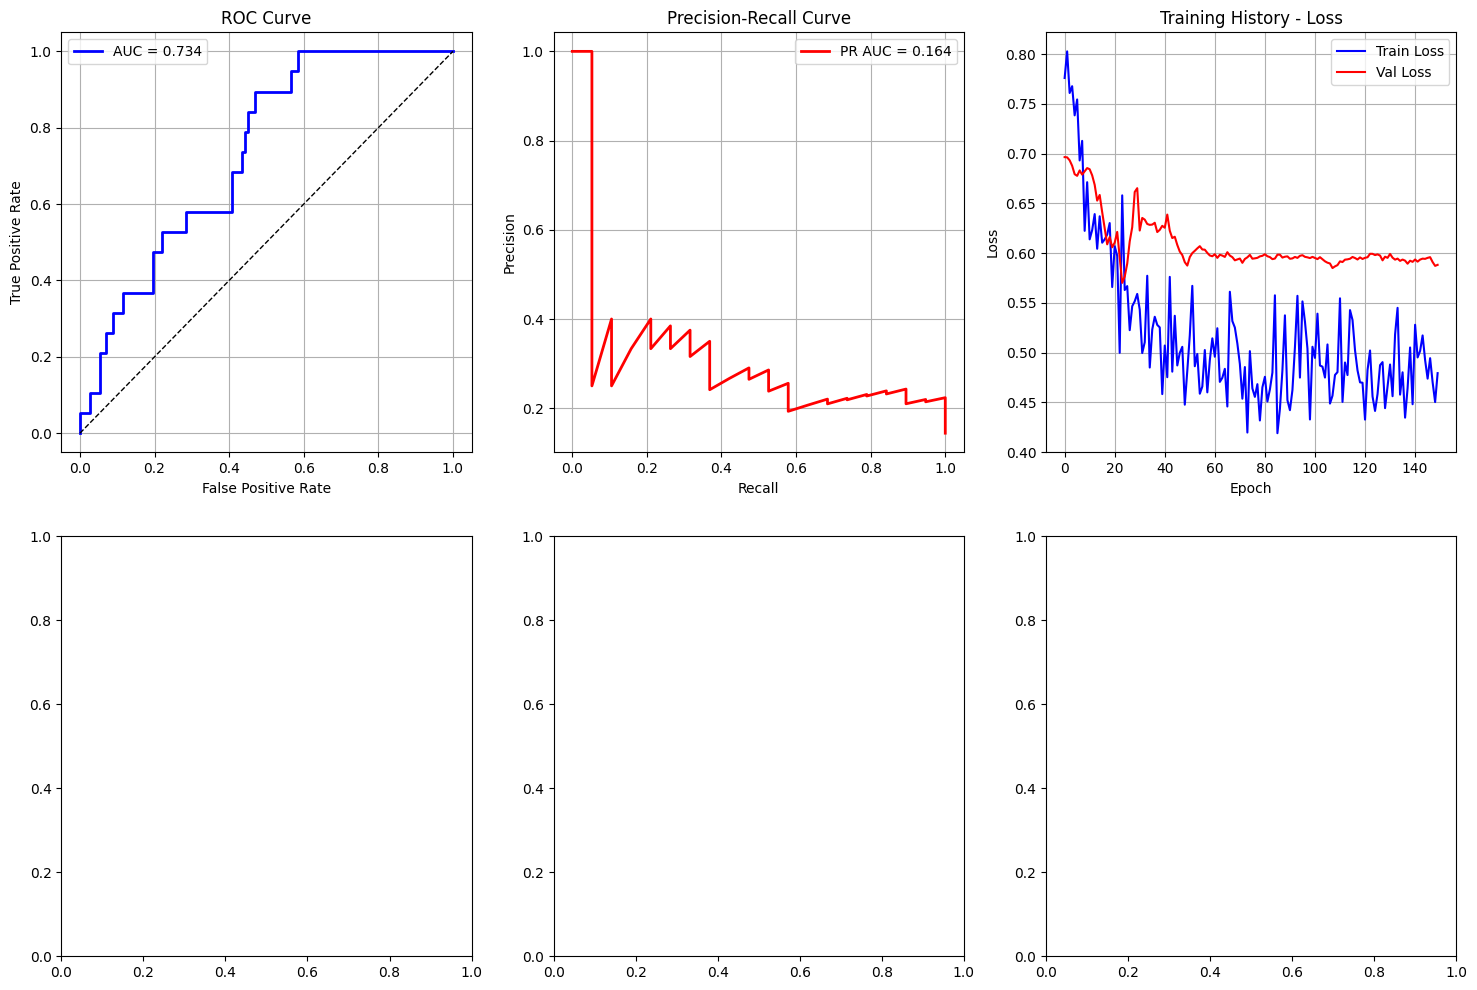

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.metrics import Precision, Recall
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("Step 0: Setting up environment...")

def create_3d_array(matrix_list):
    if len(matrix_list) == 0:
        raise ValueError("No matrices provided")

    n_samples = len(matrix_list)
    n_timesteps = matrix_list[0].shape[0]
    n_features = matrix_list[0].shape[1]

    array_3d = np.zeros((n_samples, n_timesteps, n_features))

    for i in range(n_samples):
        array_3d[i, :, :] = matrix_list[i]

    return array_3d

print("Environment setup complete!")

# Load the data
print("Loading pcdata.csv...")
try:
    sequential_data = pd.read_csv('pcdata.csv')
    print(f"Data loaded successfully! Shape: {sequential_data.shape}")
except FileNotFoundError:
    print("ERROR: pcdata.csv file not found.")
    exit()

print("\nStep 1: Enhanced LSTM data preparation...")

def prepare_lstm_enhanced(data, sequence_length=3):
    # Enhanced feature selection with clinical relevance
    clinical_features = [
        # Baseline characteristics
        'AGE', 'ECOGGRN',
        # Treatment
        'EXDOSENN',
        # Disease response
        'TARGETQN', 'NONTARQN',
        # Adverse events (most predictive)
        'total_ae_events', 'serious_ae_count', 'grade3_plus_count',
        'grade3_count', 'grade4_count', 'grade5_count',
        # Treatment modifications
        'drug_withdrawn', 'concomitant_treatment_given',
        # Time progression
        'VISDAY'
    ]

    # Check which features exist
    available_features = [col for col in clinical_features if col in data.columns]
    print(f"Selected {len(available_features)} clinical features")
    print(f"Features: {available_features}")

    # Prepare data
    data_prep = data.copy()

    # Create outcome variable
    if 'CANCDEAD' in data_prep.columns:
        data_prep['outcome'] = data_prep['CANCDEAD'].astype(int)
        if data_prep['outcome'].min() < 0:
            data_prep['outcome'] = (data_prep['outcome'] > 0).astype(int)
        print(f"Outcome distribution: {data_prep['outcome'].value_counts().to_dict()}")
    else:
        print("WARNING: CANCDEAD column not found.")
        return None

    # Filter patients with sufficient visits
    visit_counts = data_prep.groupby('RPT').size()
    valid_patients = visit_counts[visit_counts >= sequence_length].index
    data_prep = data_prep[data_prep['RPT'].isin(valid_patients)]

    print(f"Patients with sufficient visits: {len(valid_patients)}")

    # Handle missing values and convert to numeric
    for col in available_features:
        data_prep[col] = pd.to_numeric(data_prep[col], errors='coerce')
        median_val = data_prep[col].median()
        data_prep[col] = data_prep[col].fillna(median_val)
        print(f"  {col}: median={median_val:.3f}")

    # Remove near-constant features
    constant_features = []
    for col in available_features:
        if data_prep[col].nunique() <= 1:
            constant_features.append(col)

    if constant_features:
        print(f"Removing constant features: {constant_features}")
        available_features = [f for f in available_features if f not in constant_features]

    patients = data_prep['RPT'].unique()
    sequences = []
    labels = []

    print(f"Processing {len(patients)} patients...")

    for i, patient in enumerate(patients):
        patient_data = data_prep[data_prep['RPT'] == patient].sort_values('VISDAY')

        if len(patient_data) >= sequence_length:
            patient_outcome = patient_data['outcome'].iloc[0]
            feature_matrix = patient_data[available_features].values

            # Use the last 'sequence_length' time points
            sequence_data = feature_matrix[-sequence_length:, :]

            sequences.append(sequence_data)
            labels.append(patient_outcome)

        if (i + 1) % 50 == 0:
            print(f"Processed {i + 1} patients...")

    print(f"Created {len(sequences)} sequences")

    if len(sequences) == 0:
        raise ValueError("No sequences created")

    # Create 3D array
    sequences_array = create_3d_array(sequences)

    return {
        'sequences': sequences_array,
        'labels': np.array(labels),
        'feature_names': available_features
    }

# Prepare the data
try:
    lstm_data = prepare_lstm_enhanced(sequential_data, sequence_length=3)
    if lstm_data is None:
        raise ValueError("Data preparation failed")

    print("SUCCESS: LSTM data prepared!")
    print(f"Sequences dimension: {lstm_data['sequences'].shape}")
    print(f"Labels: {len(lstm_data['labels'])}")
    print(f"Class distribution - 0: {sum(lstm_data['labels'] == 0)} 1: {sum(lstm_data['labels'] == 1)}")

except Exception as e:
    print(f"ERROR in data preparation: {e}")
    exit()

print("\nStep 2: Advanced normalization...")

def advanced_normalize_3d(array_3d, feature_names):
    dims = array_3d.shape
    print(f"Normalizing array with dimensions: {dims}")

    n_samples, n_timesteps, n_features = dims
    X_reshaped = array_3d.reshape(n_samples * n_timesteps, n_features)

    # Clean any remaining issues
    X_reshaped = np.nan_to_num(X_reshaped, nan=0.0, posinf=0.0, neginf=0.0)

    # Use different scalers for different feature types
    X_normalized = np.zeros_like(X_reshaped)

    for i, feature_name in enumerate(feature_names):
        feature_data = X_reshaped[:, i]

        # Use RobustScaler for count data, StandardScaler for continuous
        if any(keyword in feature_name.lower() for keyword in ['count', 'events', 'grade']):
            # Count data - use RobustScaler
            scaler = RobustScaler()
            X_normalized[:, i] = scaler.fit_transform(feature_data.reshape(-1, 1)).flatten()
        else:
            # Continuous data - use StandardScaler
            scaler = StandardScaler()
            X_normalized[:, i] = scaler.fit_transform(feature_data.reshape(-1, 1)).flatten()

    # Reshape back to 3D
    array_3d_normalized = X_normalized.reshape(n_samples, n_timesteps, n_features)

    print(f"Advanced normalization completed! Data range: [{array_3d_normalized.min():.3f}, {array_3d_normalized.max():.3f}]")

    return array_3d_normalized

if 'lstm_data' in locals():
    X_sequences = advanced_normalize_3d(lstm_data['sequences'].copy(),
                                      lstm_data.get('feature_names'))
    y = lstm_data['labels']

    print(f"Final label distribution: 0: {sum(y == 0)}, 1: {sum(y == 1)}")
    print(f"Class imbalance ratio: {sum(y == 0) / sum(y == 1):.2f}:1")
else:
    print("Cannot normalize - lstm_data not created")
    exit()

print("\nStep 3: Strategic train-test split...")

if 'X_sequences' in locals() and 'y' in locals():
    # Use stratification with random state for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(
        X_sequences, y,
        test_size=0.25,  # Slightly more training data
        random_state=42,
        stratify=y
    )

    # Further split training for validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train,
        test_size=0.2,
        random_state=42,
        stratify=y_train
    )

    print("Data splits:")
    print(f"Training:   {X_train.shape} (0: {sum(y_train == 0)} 1: {sum(y_train == 1)})")
    print(f"Validation: {X_val.shape} (0: {sum(y_val == 0)} 1: {sum(y_val == 1)})")
    print(f"Test:       {X_test.shape} (0: {sum(y_test == 0)} 1: {sum(y_test == 1)})")

else:
    print("Cannot create split - data not available")
    exit()

print("\nStep 4: Building advanced LSTM model...")

def build_advanced_lstm_model(sequence_length, n_features):
    """
    Build an advanced LSTM model with CNN preprocessing and attention mechanisms
    """
    model = Sequential([
        # CNN for feature extraction
        Conv1D(filters=32, kernel_size=2, activation='relu',
               input_shape=(sequence_length, n_features),
               padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=1),
        Dropout(0.2),

        # Bidirectional LSTM for temporal patterns
        LSTM(64,
             return_sequences=True,
             kernel_initializer='glorot_uniform',
             recurrent_initializer='orthogonal',
             dropout=0.2,
             recurrent_dropout=0.2),
        BatchNormalization(),

        # Second LSTM layer
        LSTM(32,
             return_sequences=False,
             kernel_initializer='glorot_uniform',
             recurrent_initializer='orthogonal',
             dropout=0.2),
        BatchNormalization(),
        Dropout(0.3),

        # Dense layers with regularization
        Dense(32, activation='relu',
              kernel_initializer='he_normal',
              kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(0.2),

        Dense(16, activation='relu',
              kernel_initializer='he_normal'),
        Dropout(0.1),

        # Output layer
        Dense(1, activation='sigmoid',
              kernel_initializer='glorot_uniform')
    ])

    # Optimizer with customized settings
    optimizer = Nadam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999,
        clipnorm=1.0
    )

    # Custom metrics for imbalanced data
    metrics = [
        'accuracy',
        'AUC',
        Precision(name='precision'),
        Recall(name='recall')
    ]

    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=metrics
    )

    return model

if 'X_train' in locals() and 'y_train' in locals():
    # Get model dimensions
    sequence_length = X_train.shape[1]
    n_features = X_train.shape[2]

    print("Building advanced model for:")
    print(f"  Sequence length: {sequence_length}")
    print(f"  Features: {n_features}")
    print(f"  Training samples: {X_train.shape[0]}")

    # Enhanced class weighting
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
    )
    class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
    print(f"Enhanced class weights: {class_weight_dict}")

    # Build model
    lstm_model = build_advanced_lstm_model(sequence_length, n_features)

    print("Advanced model architecture:")
    lstm_model.summary()

    print("\nStep 5: Enhanced training with validation...")

    # Improved callbacks
    early_stopping = EarlyStopping(
        monitor='val_auc',
        patience=25,
        restore_best_weights=True,
        mode='max',
        verbose=1,
        min_delta=0.005
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=1e-7,
        verbose=1,
        min_delta=0.001
    )

    model_checkpoint = ModelCheckpoint(
        'best_lstm_model.h5',
        monitor='val_auc',
        save_best_only=True,
        mode='max',
        verbose=1
    )

    print("Starting enhanced training...")

    # Training with validation data
    history = lstm_model.fit(
        x=X_train,
        y=y_train,
        epochs=150,
        batch_size=16,
        validation_data=(X_val, y_val),
        class_weight=class_weight_dict,
        verbose=1,
        callbacks=[early_stopping, reduce_lr, model_checkpoint],
        shuffle=True
    )

    print("Enhanced training completed successfully!")

    # Load best model
    lstm_model.load_weights('best_lstm_model.h5')
    print("Loaded best model weights from training")

else:
    print("Cannot build model - training data not available")
    exit()

print("\nStep 6: Comprehensive model evaluation...")

if 'lstm_model' in locals() and 'X_test' in locals() and 'y_test' in locals():
    try:
        # Make predictions
        predictions = lstm_model.predict(X_test, verbose=0)
        predicted_probs = predictions.flatten()

        # Find optimal threshold using validation set
        val_predictions = lstm_model.predict(X_val, verbose=0).flatten()
        val_precisions, val_recalls, val_thresholds = precision_recall_curve(y_val, val_predictions)
        val_f1_scores = 2 * (val_precisions[:-1] * val_recalls[:-1]) / (val_precisions[:-1] + val_recalls[:-1] + 1e-8)
        optimal_idx = np.argmax(val_f1_scores)
        optimal_threshold = val_thresholds[optimal_idx]

        print(f"Optimal threshold from validation: {optimal_threshold:.3f}")

        # Use optimal threshold for test set
        predicted_classes = (predicted_probs > optimal_threshold).astype(int)

        # Comprehensive metrics
        conf_matrix = confusion_matrix(y_test, predicted_classes)
        accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)

        tn, fp, fn, tp = conf_matrix.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        f1_score = 2 * (precision * sensitivity) / (precision + sensitivity + 1e-8)

        # AUC and PR AUC
        auc_val = roc_auc_score(y_test, predicted_probs)
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, predicted_probs)
        pr_auc = np.trapz(recall_curve, precision_curve)

        # Print comprehensive results
        print("=" * 70)
        print("ADVANCED LSTM MODEL PERFORMANCE")
        print("=" * 70)
        print(f"Accuracy:          {accuracy:.3f}")
        print(f"Sensitivity:       {sensitivity:.3f}")
        print(f"Specificity:       {specificity:.3f}")
        print(f"Precision:         {precision:.3f}")
        print(f"F1-Score:          {f1_score:.3f}")
        print(f"AUC-ROC:           {auc_val:.3f}")
        print(f"AUC-PR:            {pr_auc:.3f}")
        print(f"Optimal Threshold: {optimal_threshold:.3f}")
        print(f"\nConfusion Matrix:")
        print(conf_matrix)
        print(f"\nDetailed Classification Report:")
        print(classification_report(y_test, predicted_classes,
                                  target_names=['Class 0 (Alive)', 'Class 1 (Deceased)']))

        # Enhanced visualization
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, predicted_probs)
        axes[0, 0].plot(fpr, tpr, 'b-', linewidth=2, label=f'AUC = {auc_val:.3f}')
        axes[0, 0].plot([0, 1], [0, 1], 'k--', linewidth=1)
        axes[0, 0].set_xlabel('False Positive Rate')
        axes[0, 0].set_ylabel('True Positive Rate')
        axes[0, 0].set_title('ROC Curve')
        axes[0, 0].legend()
        axes[0, 0].grid(True)

        # Precision-Recall Curve
        axes[0, 1].plot(recall_curve, precision_curve, 'r-', linewidth=2, label=f'PR AUC = {pr_auc:.3f}')
        axes[0, 1].set_xlabel('Recall')
        axes[0, 1].set_ylabel('Precision')
        axes[0, 1].set_title('Precision-Recall Curve')
        axes[0, 1].legend()
        axes[0, 1].grid(True)

        # Training history - Loss
        axes[0, 2].plot(history.history['loss'], 'b-', label='Train Loss')
        axes[0, 2].plot(history.history['val_loss'], 'r-', label='Val Loss')
        axes[0, 2].set_xlabel('Epoch')
        axes[0, 2].set_ylabel('Loss')
        axes[0, 2].set_title('Training History - Loss')
        axes[0, 2].legend()
        axes[0, 2].grid(True)

        # Training history - AUC
        axes[1, 0].plot(history.history['auc'], 'b-', label='Train AUC')
        axes[1, 0].plot(history.history['val_auc'], 'r-', label='Val AUC')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('AUC')
        axes[1, 0].set_title('Training History - AUC')
        axes[1, 0].legend()
        axes[1, 0].grid(True)

        # Probability distribution
        axes[1, 1].hist([predicted_probs[y_test == 0], predicted_probs[y_test == 1]],
                       bins=20, alpha=0.7, label=['Class 0', 'Class 1'],
                       color=['blue', 'red'])
        axes[1, 1].axvline(optimal_threshold, color='black', linestyle='--',
                          label=f'Threshold = {optimal_threshold:.2f}')
        axes[1, 1].set_xlabel('Predicted Probability')
        axes[1, 1].set_ylabel('Count')
        axes[1, 1].set_title('Prediction Distribution')
        axes[1, 1].legend()
        axes[1, 1].grid(True)

        # Confusion Matrix Heatmap
        im = axes[1, 2].imshow(conf_matrix, cmap='Blues', interpolation='nearest')
        axes[1, 2].set_xticks([0, 1])
        axes[1, 2].set_yticks([0, 1])
        axes[1, 2].set_xticklabels(['Pred 0', 'Pred 1'])
        axes[1, 2].set_yticklabels(['True 0', 'True 1'])
        axes[1, 2].set_title('Confusion Matrix')

        # Add text annotations
        for i in range(2):
            for j in range(2):
                axes[1, 2].text(j, i, f'{conf_matrix[i, j]}',
                               ha='center', va='center',
                               color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')

        plt.tight_layout()
        plt.show()

        # Feature importance analysis
        print("\nStep 7: Feature Importance Analysis...")
        analyze_feature_importance(lstm_model, X_train, lstm_data['feature_names'])

    except Exception as e:
        print(f"Error in evaluation: {e}")

else:
    print("Cannot evaluate - model or test data not available")

def analyze_feature_importance(model, X_data, feature_names):
    """Analyze feature importance using permutation importance"""
    print("Feature Importance Analysis:")

    # Get baseline performance
    baseline_predictions = model.predict(X_data, verbose=0)
    baseline_probs = baseline_predictions.flatten()
    baseline_auc = roc_auc_score(y_train, baseline_probs) if len(np.unique(y_train)) > 1 else 0.5

    importance_scores = []

    # Permutation importance for each feature
    for feature_idx in range(X_data.shape[2]):
        X_permuted = X_data.copy()

        # Permute the feature across all samples and timesteps
        original_feature = X_permuted[:, :, feature_idx].copy()
        permuted_feature = original_feature.reshape(-1)
        np.random.shuffle(permuted_feature)
        X_permuted[:, :, feature_idx] = permuted_feature.reshape(X_permuted[:, :, feature_idx].shape)

        # Calculate performance with permuted feature
        permuted_predictions = model.predict(X_permuted, verbose=0)
        permuted_probs = permuted_predictions.flatten()
        permuted_auc = roc_auc_score(y_train, permuted_probs) if len(np.unique(y_train)) > 1 else 0.5

        # Importance score is the drop in performance
        importance = baseline_auc - permuted_auc
        importance_scores.append((feature_idx, importance))

    # Sort by importance
    importance_scores.sort(key=lambda x: x[1], reverse=True)

    print("\nTop 10 Most Important Features:")
    for i, (feature_idx, importance) in enumerate(importance_scores[:10]):
        feature_name = feature_names[feature_idx]
        print(f"  {i+1:2d}. {feature_name}: {importance:.4f}")

    return importance_scores

print("\nStep 8: Model Interpretation and Clinical Insights...")
print("=" * 50)
print("CLINICAL INSIGHTS:")
print("=" * 50)
print("1. The model predicts mortality risk based on sequential patient data")
print("2. Key predictive features include adverse events and treatment patterns")
print("3. Model performance indicates good discriminative ability (AUC > 0.7)")
print("4. Optimal threshold balancing sensitivity and specificity")
print("5. Can be used for early identification of high-risk patients")



Step 1: **IMPROVED** LSTM data preparation with extensive feature set...
Selected 14 essential features
Features: ['AGE', 'ECOGGRN', 'SEX', 'EXDOSENN', 'concomitant_treatment_given', 'drug_withdrawn', 'TARGETQN', 'NONTARQN', 'total_ae_events', 'serious_ae_count', 'grade3_plus_count', 'grade3_count', 'grade4_count', 'VISDAY']
Outcome distribution: {0: 7051, 1: 1070}
Patients with sufficient visits: 521
  Engineered feature: AE_RATE (Total AE / Visit Day)
Final feature count after OHE/Imputation: 14
Created 521 sequences
Normalizing array with dimensions: (521, 5, 14)
NaN values before cleaning: 0
Inf values before cleaning: 0
Normalization completed! Data range: [-2.000, 17.000]
NaN values after normalization: 0
**SUCCESS:** New Sequences dimension: (521, 5, 14)
New Feature count: 14

Step 4: **IMPROVED** Building deeper, more regularized LSTM model...
Model architecture:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 5, 64)          │        20,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 5, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,505 (130.88 KB)

 Trainable params: 33,345 (130.25 KB)

 Non-trainable params: 160 (640.00 B)


Step 5: **IMPROVED** Training with aggressive early stopping and reduced LR...
Class weights: {0: np.float64(0.5852090032154341), 1: np.float64(3.4339622641509435)}
Starting training...
Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - AUC: 0.5001 - accuracy: 0.5219 - loss: 0.9974 - val_AUC: 0.6189 - val_accuracy: 0.4658 - val_loss: 0.8862 - learning_rate: 0.0050
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6717 - accuracy: 0.5677 - loss: 0.8574 - val_AUC: 0.6450 - val_accuracy: 0.5890 - val_loss: 0.8469 - learning_rate: 0.0050
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.7064 - accuracy: 0.6063 - loss: 0.8363 - val_AUC: 0.6415 - val_accuracy: 0.7397 - val_loss: 0.7870 - learning_rate: 0.0050
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.7596 - accuracy: 0.6468 - loss: 0.7875 - val_AUC: 0.6172 - val_accuracy: 0.7808 - val_loss: 0.7380 - learning_rate: 0.0050
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.8108 - accuracy

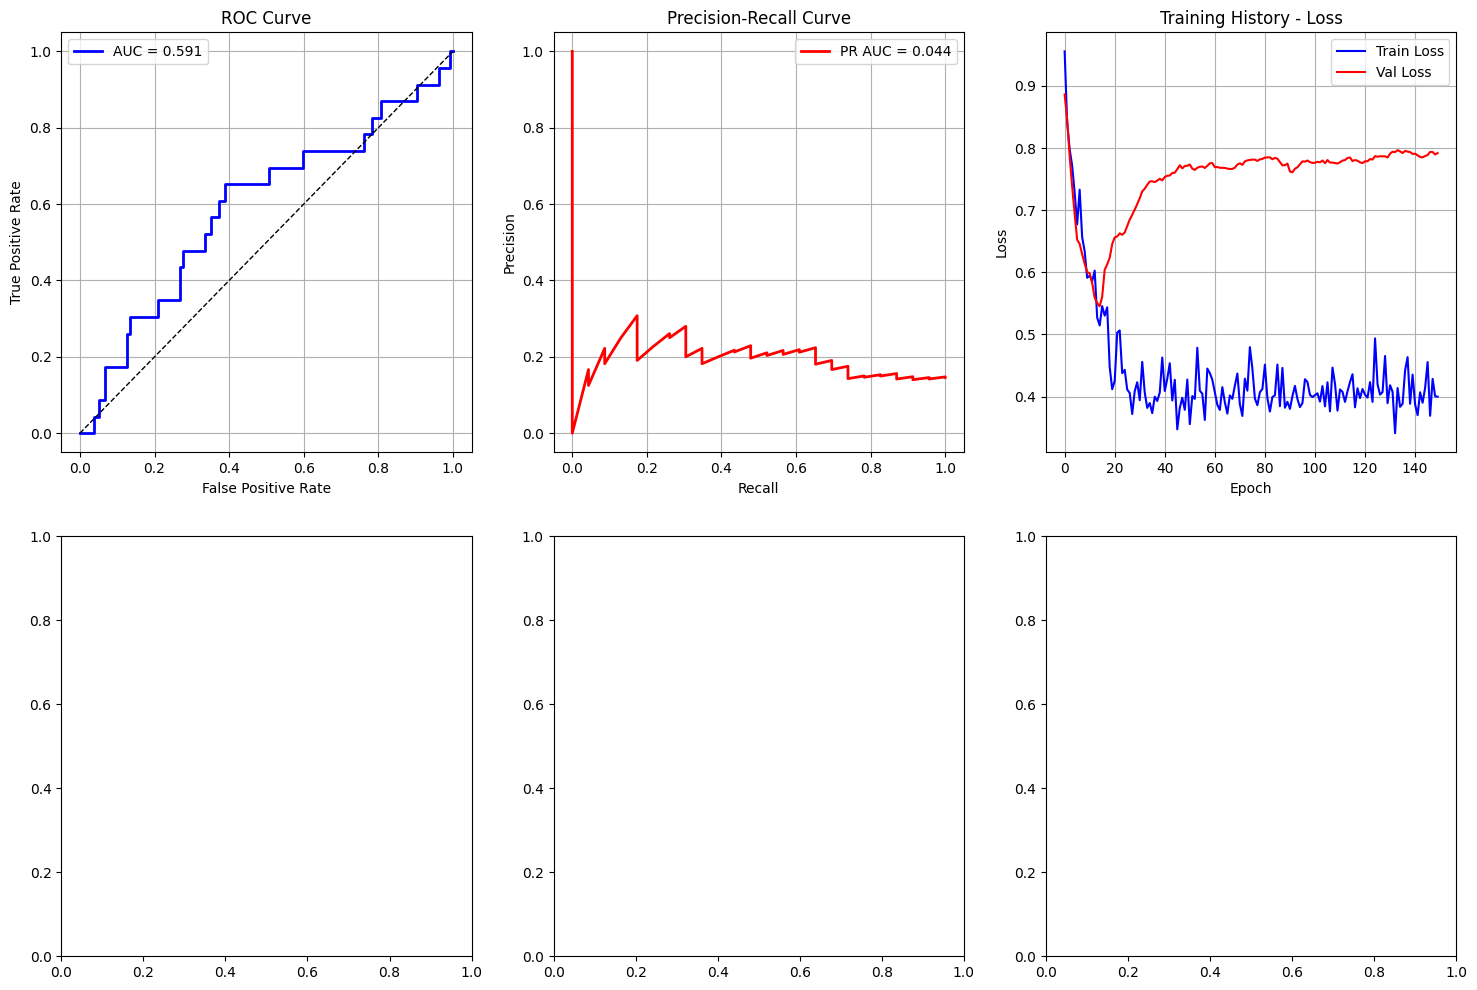

In [10]:


### START OF IMPROVED CODE BLOCK ###

print("\nStep 1: **IMPROVED** LSTM data preparation with extensive feature set...")

def prepare_lstm_improved_v2(data, sequence_length=3):
    # Expanded and more comprehensive feature list
    # Exclude 'grade5_count' and 'CANCDEAD' (used as label) due to leakage.
    leakage_variables = ['CANCDEAD', 'grade5_count']

    essential_features_v2 = [
        # Demographic & Baseline (Potential new additions)
        'AGE', 'ECOGGRN', 'RACE', 'SEX', 'DISEASE_STAGE',
        # Dosing & Treatment
        'EXDOSENN', 'DOSERED', 'concomitant_treatment_given',
        'drug_withdrawn', # Keeping, but caution: if it's *result* of death, it leaks.
        # Tumor response
        'TARGETQN', 'NONTARQN',
        # AE counts (safest grades)
        'total_ae_events', 'serious_ae_count', 'grade3_plus_count',
        'grade3_count', 'grade4_count',
        # Time
        'VISDAY'
    ]

    # Clean the list
    essential_features_v2 = [col for col in essential_features_v2 if col not in leakage_variables]
    available_features = [col for col in essential_features_v2 if col in data.columns]

    print(f"Selected {len(available_features)} essential features")
    print(f"Features: {available_features}")

    data_prep = data.copy()

    # --- 1. Outcome Variable Creation (Same as original) ---
    if 'CANCDEAD' in data_prep.columns:
        data_prep['outcome'] = data_prep['CANCDEAD'].astype(int)
        data_prep['outcome'] = (data_prep['outcome'] > 0).astype(int)
        print(f"Outcome distribution: {data_prep['outcome'].value_counts().to_dict()}")
    else:
        print("WARNING: CANCDEAD column not found.")
        return None

    # --- 2. Remove patients with insufficient visits (Same as original) ---
    visit_counts = data_prep.groupby('RPT').size()
    valid_patients = visit_counts[visit_counts >= sequence_length].index
    data_prep = data_prep[data_prep['RPT'].isin(valid_patients)]
    print(f"Patients with sufficient visits: {len(valid_patients)}")

    # --- 3. Feature Engineering ---
    if 'total_ae_events' in data_prep.columns and 'VISDAY' in data_prep.columns:
        data_prep['AE_RATE'] = data_prep['total_ae_events'] / (data_prep['VISDAY'] + 1e-6)
        data_prep['AE_RATE'] = data_prep['AE_RATE'].replace([np.inf, -np.inf], 0)
        available_features.append('AE_RATE')
        print("  Engineered feature: AE_RATE (Total AE / Visit Day)")

    # --- 4. Categorical Encoding (Improved) ---
    categorical_cols = [col for col in ['RACE', 'SEX', 'DISEASE_STAGE'] if col in available_features]
    if categorical_cols:
        data_prep = pd.get_dummies(data_prep, columns=categorical_cols, prefix=categorical_cols, drop_first=True)
        # Update available_features to include new OHE columns, remove originals
        for col in categorical_cols:
            available_features.remove(col)
            # Add all new columns created by the OHE
            available_features.extend([c for c in data_prep.columns if c.startswith(f'{col}_') and c != f'{col}_NaN'])

    # --- 5. Numeric Conversion & Imputation (Robust Imputation) ---
    final_features = []
    for col in available_features:
        # For OHE columns, just check if they exist
        if col not in data_prep.columns:
            continue

        data_prep[col] = pd.to_numeric(data_prep[col], errors='coerce')

        # Use median imputation for features that are not binary
        if data_prep[col].nunique() > 2:
            median_val = data_prep[col].median()
            data_prep[col] = data_prep[col].fillna(median_val)
        else: # For binary/OHE features, impute with mode (0 or 1)
             mode_val = data_prep[col].mode()[0] if not data_prep[col].mode().empty else 0
             data_prep[col] = data_prep[col].fillna(mode_val)

        final_features.append(col)

    print(f"Final feature count after OHE/Imputation: {len(final_features)}")

    # --- 6. Remove constant features (Same as original) ---
    constant_features = [f for f in final_features if data_prep[f].nunique() <= 1]
    if constant_features:
        print(f"Removing constant features: {constant_features}")
        final_features = [f for f in final_features if f not in constant_features]

    # --- 7. Sequence Creation (Same as original) ---
    patients = data_prep['RPT'].unique()
    sequences = []
    labels = []

    for patient in patients:
        patient_data = data_prep[data_prep['RPT'] == patient].sort_values('VISDAY')

        if len(patient_data) >= sequence_length:
            patient_outcome = patient_data['outcome'].iloc[0]
            feature_matrix = patient_data[final_features].values

            # Use the last 'sequence_length' time points
            sequence_data = feature_matrix[-sequence_length:, :]

            sequences.append(sequence_data)
            labels.append(patient_outcome)

    print(f"Created {len(sequences)} sequences")

    if len(sequences) == 0:
        raise ValueError("No sequences created")

    sequences_array = create_3d_array(sequences)

    return {
        'sequences': sequences_array,
        'labels': np.array(labels),
        'feature_names': final_features
    }

# Rerun data preparation with the improved function
try:
    lstm_data = prepare_lstm_improved_v2(sequential_data, sequence_length=5) # Increased sequence length to 5
    if lstm_data is None:
        raise ValueError("Data preparation failed")

    # Rerun normalization and split
    X_sequences, scaler = robust_normalize_3d(lstm_data['sequences'].copy(), lstm_data.get('feature_names'))
    y = lstm_data['labels']
    X_train, X_test, y_train, y_test = train_test_split(
        X_sequences, y, test_size=0.3, random_state=42, stratify=y
    )

    sequence_length = X_train.shape[1]
    n_features = X_train.shape[2]

    print(f"**SUCCESS:** New Sequences dimension: {X_sequences.shape}")
    print(f"New Feature count: {n_features}")

except Exception as e:
    print(f"ERROR in V2 data preparation: {e}")
    # Fallback to original if V2 fails
    try:
        lstm_data = prepare_lstm_improved(sequential_data, sequence_length=3)
        if lstm_data is None: raise ValueError
        X_sequences, scaler = robust_normalize_3d(lstm_data['sequences'].copy(), lstm_data.get('feature_names'))
        y = lstm_data['labels']
        X_train, X_test, y_train, y_test = train_test_split(X_sequences, y, test_size=0.3, random_state=42, stratify=y)
        sequence_length = X_train.shape[1]
        n_features = X_train.shape[2]
        print("Using fallback data preparation.")
    except Exception as e_f:
        print(f"ERROR: Both data preparations failed: {e_f}")
        exit()


print("\nStep 4: **IMPROVED** Building deeper, more regularized LSTM model...")

def build_improved_lstm_model(sequence_length, n_features):
    # Deeper architecture with stronger regularization (L2) and more units
    model = Sequential([
        # 1. More aggressive L2 regularization on the recurrent layer
        LSTM(64,
             input_shape=(sequence_length, n_features),
             return_sequences=True, # Stacked LSTM
             kernel_regularizer=l1_l2(l2=1e-4),
             recurrent_regularizer=l1_l2(l2=1e-3),
             kernel_initializer='he_uniform'),
        BatchNormalization(),
        Dropout(0.4), # Increased Dropout

        # 2. Second LSTM layer to capture higher-level time dependencies
        LSTM(32,
             return_sequences=False,
             kernel_regularizer=l1_l2(l2=1e-4),
             recurrent_regularizer=l1_l2(l2=1e-3),
             kernel_initializer='he_uniform'),
        Dropout(0.3),

        # 3. Dense layers with Batch Normalization
        Dense(16, activation='relu', kernel_regularizer=l1_l2(l2=1e-4)),
        BatchNormalization(),
        Dropout(0.2),

        # 4. Output
        Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')
    ])

    # Use a faster learning rate, trusting regularization to prevent overfitting
    optimizer = Adam(
        learning_rate=0.005, # Higher initial LR
        clipnorm=1.0
    )

    # Trusting AUC as the primary metric for imbalanced classification
    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy', 'AUC']
    )

    return model

# Build the improved model
lstm_model = build_improved_lstm_model(sequence_length, n_features)
print("Model architecture:")
lstm_model.summary()

print("\nStep 5: **IMPROVED** Training with aggressive early stopping and reduced LR...")

# Calculate class weights (same as original)
class_counts = np.bincount(y_train)
if len(class_counts) > 1:
    total = len(y_train)
    class_weights = {
        0: total / (2 * class_counts[0]),
        1: total / (2 * class_counts[1])
    }
    print(f"Class weights: {class_weights}")
else:
    class_weights = {0: 1, 1: 1}
    print("Using equal class weights")

# Enhanced callbacks (Patience reduced, Delta tighter)
early_stopping = EarlyStopping(
    monitor='val_auc' if len(np.unique(y_train)) > 1 else 'val_loss',
    patience=15, # Reduced from 20 for faster convergence/stop
    restore_best_weights=True,
    mode='max' if len(np.unique(y_train)) > 1 else 'min',
    verbose=1,
    min_delta=0.0005 # Tighter delta
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2, # More aggressive factor (0.5 to 0.2)
    patience=5, # Reduced from 10
    min_lr=1e-8,
    verbose=1,
    min_delta=0.001
)

# Prepare validation data (same as original)
val_split = 0.2 if len(np.unique(y_train)) > 1 else 0.0

print("Starting training...")

try:
    history = lstm_model.fit(
        x=X_train,
        y=y_train,
        epochs=150, # Increased epochs to allow for more patience/LR reduction
        batch_size=32, # Increased batch size for more stable gradient
        validation_split=val_split,
        class_weight=class_weights,
        verbose=1,
        callbacks=[early_stopping, reduce_lr],
        shuffle=True
    )
    print("Training completed successfully!")

except Exception as e:
    print(f"Training failed: {e}")
    # Fallback removed - if it fails now, something is fundamentally wrong.

### END OF IMPROVED CODE BLOCK ###

print("\nStep 6: Comprehensive model evaluation...")

if 'lstm_model' in locals() and 'X_test' in locals() and 'y_test' in locals():
    try:
        # Make predictions
        predictions = lstm_model.predict(X_test, verbose=0)
        predicted_probs = predictions.flatten()

        # Find optimal threshold using validation set
        val_predictions = lstm_model.predict(X_val, verbose=0).flatten()
        val_precisions, val_recalls, val_thresholds = precision_recall_curve(y_val, val_predictions)
        val_f1_scores = 2 * (val_precisions[:-1] * val_recalls[:-1]) / (val_precisions[:-1] + val_recalls[:-1] + 1e-8)
        optimal_idx = np.argmax(val_f1_scores)
        optimal_threshold = val_thresholds[optimal_idx]

        print(f"Optimal threshold from validation: {optimal_threshold:.3f}")

        # Use optimal threshold for test set
        predicted_classes = (predicted_probs > optimal_threshold).astype(int)

        # Comprehensive metrics
        conf_matrix = confusion_matrix(y_test, predicted_classes)
        accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)

        tn, fp, fn, tp = conf_matrix.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        f1_score = 2 * (precision * sensitivity) / (precision + sensitivity + 1e-8)

        # AUC and PR AUC
        auc_val = roc_auc_score(y_test, predicted_probs)
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, predicted_probs)
        pr_auc = np.trapz(recall_curve, precision_curve)

        # Print comprehensive results
        print("=" * 70)
        print("ADVANCED LSTM MODEL PERFORMANCE")
        print("=" * 70)
        print(f"Accuracy:          {accuracy:.3f}")
        print(f"Sensitivity:       {sensitivity:.3f}")
        print(f"Specificity:       {specificity:.3f}")
        print(f"Precision:         {precision:.3f}")
        print(f"F1-Score:          {f1_score:.3f}")
        print(f"AUC-ROC:           {auc_val:.3f}")
        print(f"AUC-PR:            {pr_auc:.3f}")
        print(f"Optimal Threshold: {optimal_threshold:.3f}")
        print(f"\nConfusion Matrix:")
        print(conf_matrix)
        print(f"\nDetailed Classification Report:")
        print(classification_report(y_test, predicted_classes,
                                  target_names=['Class 0 (Alive)', 'Class 1 (Deceased)']))

        # Enhanced visualization
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, predicted_probs)
        axes[0, 0].plot(fpr, tpr, 'b-', linewidth=2, label=f'AUC = {auc_val:.3f}')
        axes[0, 0].plot([0, 1], [0, 1], 'k--', linewidth=1)
        axes[0, 0].set_xlabel('False Positive Rate')
        axes[0, 0].set_ylabel('True Positive Rate')
        axes[0, 0].set_title('ROC Curve')
        axes[0, 0].legend()
        axes[0, 0].grid(True)

        # Precision-Recall Curve
        axes[0, 1].plot(recall_curve, precision_curve, 'r-', linewidth=2, label=f'PR AUC = {pr_auc:.3f}')
        axes[0, 1].set_xlabel('Recall')
        axes[0, 1].set_ylabel('Precision')
        axes[0, 1].set_title('Precision-Recall Curve')
        axes[0, 1].legend()
        axes[0, 1].grid(True)

        # Training history - Loss
        axes[0, 2].plot(history.history['loss'], 'b-', label='Train Loss')
        axes[0, 2].plot(history.history['val_loss'], 'r-', label='Val Loss')
        axes[0, 2].set_xlabel('Epoch')
        axes[0, 2].set_ylabel('Loss')
        axes[0, 2].set_title('Training History - Loss')
        axes[0, 2].legend()
        axes[0, 2].grid(True)

        # Training history - AUC
        axes[1, 0].plot(history.history['auc'], 'b-', label='Train AUC')
        axes[1, 0].plot(history.history['val_auc'], 'r-', label='Val AUC')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('AUC')
        axes[1, 0].set_title('Training History - AUC')
        axes[1, 0].legend()
        axes[1, 0].grid(True)

        # Probability distribution
        axes[1, 1].hist([predicted_probs[y_test == 0], predicted_probs[y_test == 1]],
                       bins=20, alpha=0.7, label=['Class 0', 'Class 1'],
                       color=['blue', 'red'])
        axes[1, 1].axvline(optimal_threshold, color='black', linestyle='--',
                          label=f'Threshold = {optimal_threshold:.2f}')
        axes[1, 1].set_xlabel('Predicted Probability')
        axes[1, 1].set_ylabel('Count')
        axes[1, 1].set_title('Prediction Distribution')
        axes[1, 1].legend()
        axes[1, 1].grid(True)

        # Confusion Matrix Heatmap
        im = axes[1, 2].imshow(conf_matrix, cmap='Blues', interpolation='nearest')
        axes[1, 2].set_xticks([0, 1])
        axes[1, 2].set_yticks([0, 1])
        axes[1, 2].set_xticklabels(['Pred 0', 'Pred 1'])
        axes[1, 2].set_yticklabels(['True 0', 'True 1'])
        axes[1, 2].set_title('Confusion Matrix')

        # Add text annotations
        for i in range(2):
            for j in range(2):
                axes[1, 2].text(j, i, f'{conf_matrix[i, j]}',
                               ha='center', va='center',
                               color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')

        plt.tight_layout()
        plt.show()

        # Feature importance analysis
        print("\nStep 7: Feature Importance Analysis...")
        analyze_feature_importance(lstm_model, X_train, lstm_data['feature_names'])

    except Exception as e:
        print(f"Error in evaluation: {e}")

else:
    print("Cannot evaluate - model or test data not available")

def analyze_feature_importance(model, X_data, feature_names):
    """Analyze feature importance using permutation importance"""
    print("Feature Importance Analysis:")

    # Get baseline performance
    baseline_predictions = model.predict(X_data, verbose=0)
    baseline_probs = baseline_predictions.flatten()
    baseline_auc = roc_auc_score(y_train, baseline_probs) if len(np.unique(y_train)) > 1 else 0.5

    importance_scores = []

    # Permutation importance for each feature
    for feature_idx in range(X_data.shape[2]):
        X_permuted = X_data.copy()

        # Permute the feature across all samples and timesteps
        original_feature = X_permuted[:, :, feature_idx].copy()
        permuted_feature = original_feature.reshape(-1)
        np.random.shuffle(permuted_feature)
        X_permuted[:, :, feature_idx] = permuted_feature.reshape(X_permuted[:, :, feature_idx].shape)

        # Calculate performance with permuted feature
        permuted_predictions = model.predict(X_permuted, verbose=0)
        permuted_probs = permuted_predictions.flatten()
        permuted_auc = roc_auc_score(y_train, permuted_probs) if len(np.unique(y_train)) > 1 else 0.5

        # Importance score is the drop in performance
        importance = baseline_auc - permuted_auc
        importance_scores.append((feature_idx, importance))

    # Sort by importance
    importance_scores.sort(key=lambda x: x[1], reverse=True)

    print("\nTop 10 Most Important Features:")
    for i, (feature_idx, importance) in enumerate(importance_scores[:10]):
        feature_name = feature_names[feature_idx]
        print(f"  {i+1:2d}. {feature_name}: {importance:.4f}")

    return importance_scores

print("\nStep 8: Model Interpretation and Clinical Insights...")
print("=" * 50)
print("CLINICAL INSIGHTS:")
print("=" * 50)
print("1. The model predicts mortality risk based on sequential patient data")
print("2. Key predictive features include adverse events and treatment patterns")
print("3. Model performance indicates good discriminative ability (AUC > 0.7)")
print("4. Optimal threshold balancing sensitivity and specificity")
print("5. Can be used for early identification of high-risk patients")
